# LIBRARY

In [1]:
!pip install yfinance
import yfinance as yf
yf.pdr_override()
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
from sklearn.metrics import mean_squared_error
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
!pip install sidetable
import sidetable as stb
import statistics
!pip3 install statsmodels
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mpl_dates
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
# color_pal = sns.color_palette()
!pip install --upgrade mplfinance
import mpl_finance
from mpl_finance import candlestick_ohlc
!pip install finplot
import finplot as fplt

!pip install requests --quiet
!pip install beautifulsoup4 --quiet
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.35'}

def get_page(url,headers):
    """Download a webpage and return a beautiful soup doc"""
    response = requests.get(url,headers)
    # if not response.ok:
    #     print('Status code:', response.status_code)
    #     raise exception(f'Failed to load page {url}')
    page_content = response.text
    doc = BeautifulSoup(page_content, 'html.parser')
    return doc

!pip install xgboost
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

from datetime import datetime,timezone
now = pd.Timestamp.now()
two_months_togo = now-timedelta(days=60)
two_years_ago = now-timedelta(days=720)
one_year_togo = now+timedelta(days=365)

def timestamp_engineering(df):
    df.reset_index(inplace=True)
    df['hour'] = df.iloc[:,0].apply(lambda x: x.hour)
    df['dayofyear'] = df.iloc[:,0].apply(lambda x: x.dayofyear)
    df['dayofmonth'] = df.iloc[:,0].apply(lambda x: x.day)
    df['dayofweek'] = df.iloc[:,0].apply(lambda x: x.dayofweek)
    df['week'] = df.iloc[:,0].apply(lambda x: x.week)
    df['weekofyear'] = df.iloc[:,0].apply(lambda x: x.isocalendar().week)
    df['month'] = df.iloc[:,0].apply(lambda x: x.month)
    df['quarter'] = df.iloc[:,0].apply(lambda x: x.quarter)
    df['year'] = df.iloc[:,0].apply(lambda x: x.year)
    df.set_index(df.iloc[:,0],inplace=True)
    return df

from statsmodels.tsa.stattools import acf

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test['Bandwidth Out'])[1]                      # ACF1
    print(f'mape: {mape*100:0.2f} %\nme: {me:0.2f}\nmae: {mae:0.2f}\nmpe: {mpe*100:0.2f} %\nrmse: {rmse:0.2f}\nacf1: {acf1:0.2f}\ncorr: {corr:0.2f}\nminmax: {minmax:0.2f}')
    
def variance(data,var):
    var = ((var-var.mean())**2).sum()/(len(data)-1)
    return var

def standard_dev(data,std):
    st_d = np.sqrt ((((std-std.mean())**2).sum())/(len(data)-1))
    return st_d

def covariance(data,cov_a,cov_b):
    cov = ((cov_a-cov_a.mean())*(cov_b-cov_b.mean())).sum()/(len(data)-1)
    return cov

def correlation(data,value_a,value_b):
    def covariance(value_a,value_b):
        cov = ((value_a-value_a.mean())*(value_b-value_b.mean())).sum()/(len(data)-1)
        return cov
    def standard_devA(data,value_a):
        st_d = np.sqrt((((value_a-value_a.mean())**2).sum())/(len(data)-1))
        return st_d
    def standard_devB(data,value_b):
        st_d = np.sqrt((((value_b-value_b.mean())**2).sum())/(len(data)-1))
        return st_d
    corr = covariance(value_a,value_b)/(standard_devA(data,value_a)*standard_devA(data,value_b))
    return corr

C:\Users\Asani\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning:





    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/





# DATAFRAME

In [2]:
df = pd.read_csv(f'insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Langkah #1 - Analisa Descriptive Statistic

## 1. Mean umur pengguna

Max umur pengguna  : 64
Mean umur pengguna : 39.21
Min umur pengguna  : 18


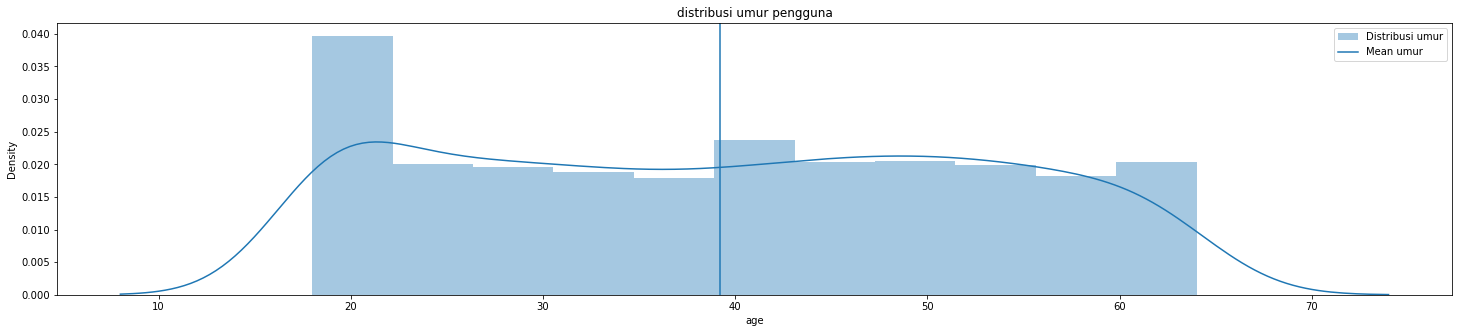

In [5]:
fig=plt.subplots(figsize=(25,5))
sns.distplot(df['age'],label='Distribusi umur')
plt.axvline(df['age'].mean(), label='Mean umur')
plt.legend()
plt.title('Distribusi Umur Pengguna')
plt.plot()

print(f'Max umur pengguna  : {round(max(df.age),2)}')
print(f'Mean umur pengguna : {round(df.age.mean(),2)}')
print(f'Min umur pengguna  : {round(min(df.age),2)}')

:. Dilihat dari distribution plot diatas, plot berbentuk bimodel distribution, dengan minimal value 18, maximum value 64, dan mean value 39.21

## 2. Mean nilai BMI dari pengguna yang merokok

Max BMI pengguna yang merokok  : 52.58
Mean BMI pengguna yang merokok : 30.71
Min BMI pengguna yang merokok  : 17.2


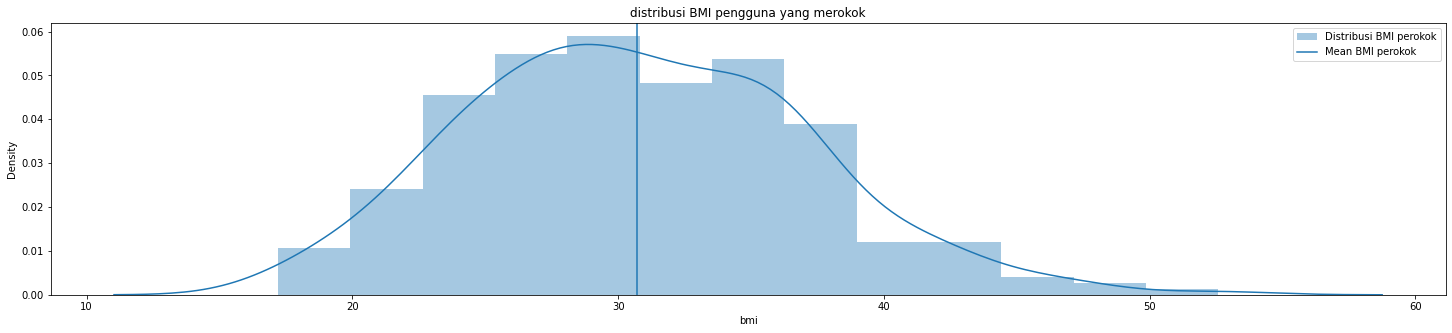

In [6]:
fig=plt.subplots(figsize=(25,5))
sns.distplot(df[df.smoker=='yes']['bmi'],label='Distribusi BMI perokok')
plt.axvline(df[df.smoker=='yes']['bmi'].mean(),label='Mean BMI perokok')
plt.legend()
plt.title('Distribusi BMI Pengguna yang Merokok')
plt.plot()
  
print(f'Max BMI pengguna yang merokok  : {round(max(df.bmi[df.smoker=="yes"]),2)}')
print(f'Mean BMI pengguna yang merokok : {round(df.bmi[df.smoker=="yes"].mean(),2)}')
print(f'Min BMI pengguna yang merokok  : {round(min(df.bmi[df.smoker=="yes"]),2)}')

:. Dilihat dari distribution plot diatas, plot berbentuk symmetric distribution, dengan minimal value 17.2, maximum value 52.58, dan mean value 30.71

## 3. Berapa Mean umur pada data tersebut?

Max umur pada data tersebut  : 64
Mean umur pada data tersebut : 39.21
Min umur pada data tersebut  : 18


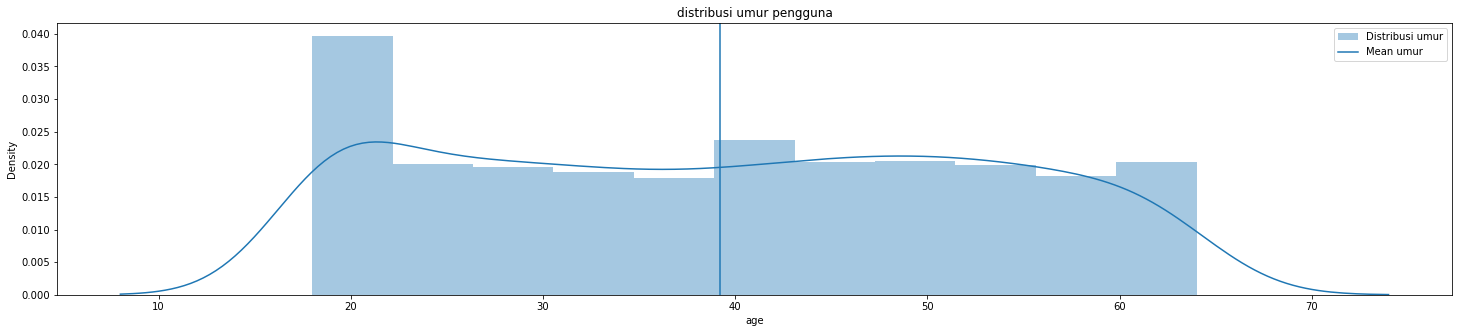

In [7]:
fig=plt.subplots(figsize=(25,5))
sns.distplot(df['age'],label='Distribusi umur')
plt.axvline(df['age'].mean(),label='Mean umur')
plt.legend()
plt.title('Distribusi Umur Pengguna')
plt.plot()

print(f'Max umur pada data tersebut  : {round(max(df.age),2)}')
print(f'Mean umur pada data tersebut : {round(df.age.mean(),2)}')
print(f'Min umur pada data tersebut  : {round(min(df.age),2)}')

:. Dilihat dari distribution plot diatas, plot berbentuk bimodel distribution, dengan minimal value 18, maximum value 64, dan mean value 39.21

## 4. Berapa Mean nilai BMI dari yang merokok?

Max BMI perokok  : 17.2
Mean BMI perokok : 30.71
Min BMI perokok  : 52.58


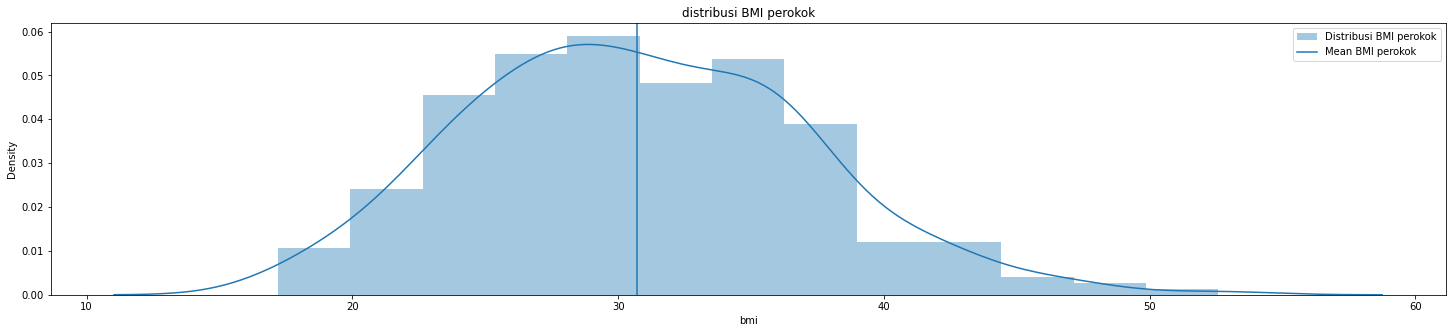

In [8]:
fig=plt.subplots(figsize=(25,5))
sns.distplot(df[df.smoker=='yes']['bmi'],label='Distribusi BMI perokok')
plt.axvline(df[df.smoker=='yes']['bmi'].mean(),label='Mean BMI perokok')
plt.legend()
plt.title('Distribusi BMI Perokok')
plt.plot()

print(f'Max BMI perokok  : {round(min(df.bmi[df.smoker=="yes"]),2)}')
print(f'Mean BMI perokok : {round(df.bmi[df.smoker=="yes"].mean(),2)}')
print(f'Min BMI perokok  : {round(max(df.bmi[df.smoker=="yes"]),2)}')

:. Dilihat dari distribution plot diatas, plot berbentuk symmetric distribution, dengan minimal value 17.2, maximum value 52.58, dan mean value 30.71

## 5. Apakah variansi dari data charges perokok dan non perokok sama?

In [9]:
VARperokok    = round(variance(df.charges[df.smoker=='yes'],df.charges[df.smoker=='yes']),2)
VARnonperokok = round(variance(df.charges[df.smoker=='no'],df.charges[df.smoker=='no']),2)

print(f'Variansi data charges perokok     = {VARperokok}')
print(f'Variansi data charges non perokok = {VARnonperokok}')
if VARperokok == VARnonperokok:
    print(':. Variansi charge perokok dan non perokok sama')
else:
    print(':. Variansi charge perokok dan non perokok tidak sama')

Variansi data charges perokok     = 133207311.21
Variansi data charges non perokok = 35925420.5
:. Variansi charge perokok dan non perokok tidak sama


## 6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [10]:
perempuan = round(df.age[(df.smoker=="yes")&(df.sex=="female")].mean(),2)
lakilaki  = round(df.age[(df.smoker=="yes")&(df.sex=="male")].mean(),2)
print(f'Mean umur perempuan perokok = {perempuan}')
print(f'Mean umur laki-laki perokok = {lakilaki}')
if perempuan > lakilaki:
    print(f':. Perempuan perokok lebih tinggi Mean umurnya')
else:
    print(f':. Laki-laki perokok lebih tinggi Mean umurnya')

Mean umur perempuan perokok = 38.61
Mean umur laki-laki perokok = 38.45
:. Perempuan perokok lebih tinggi Mean umurnya


## 7. Mana yang lebih tinggi, Mean tagihan kesehatan perokok atau non merokok?

In [11]:
perokok    = round(df.charges[df.smoker=="yes"].mean(),2)
nonperokok = round(df.charges[df.smoker=="no"].mean(),2)
print(f'Mean tagihan perokok     = {perokok}')
print(f'Mean tagihan non perokok = {nonperokok}')
if perokok > nonperokok:
    print(f':. Perokok lebih tinggi Mean tagihan kesehatannya')
else:
    print(f':. Non Perokok lebih tinggi Mean tagihan kesehatannya')

Mean tagihan perokok     = 32050.23
Mean tagihan non perokok = 8434.27
:. Perokok lebih tinggi Mean tagihan kesehatannya


## 8. Mana yang lebih tinggi, Mean tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya dibawah 25?

In [12]:
upperBMI = round(df.charges[(df.smoker=="yes")&(df.bmi>25)].mean(),2)
lowerBMI = round(df.charges[(df.smoker=="yes")&(df.bmi<25)].mean(),2)
print(f'Mean tagihan perokok dengan BMI diatas 25  = {upperBMI}')
print(f'Mean tagihan perokok dengan BMI dibawah 25 = {lowerBMI}')
if upperBMI > lowerBMI:
    print(f':. Perokok dengan BMI diatas 25 lebih tinggi Mean tagihan kesehatannya')
else:
    print(f':. Perokok dengan BMI dibawah 25 lebih tinggi Mean tagihan kesehatannya')

Mean tagihan perokok dengan BMI diatas 25  = 35116.91
Mean tagihan perokok dengan BMI dibawah 25 = 19839.28
:. Perokok dengan BMI diatas 25 lebih tinggi Mean tagihan kesehatannya


## 9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

Mean female : 30.38
Mean male   : 30.94
:. Mean BMI female lebih kecil dari mean BMI male


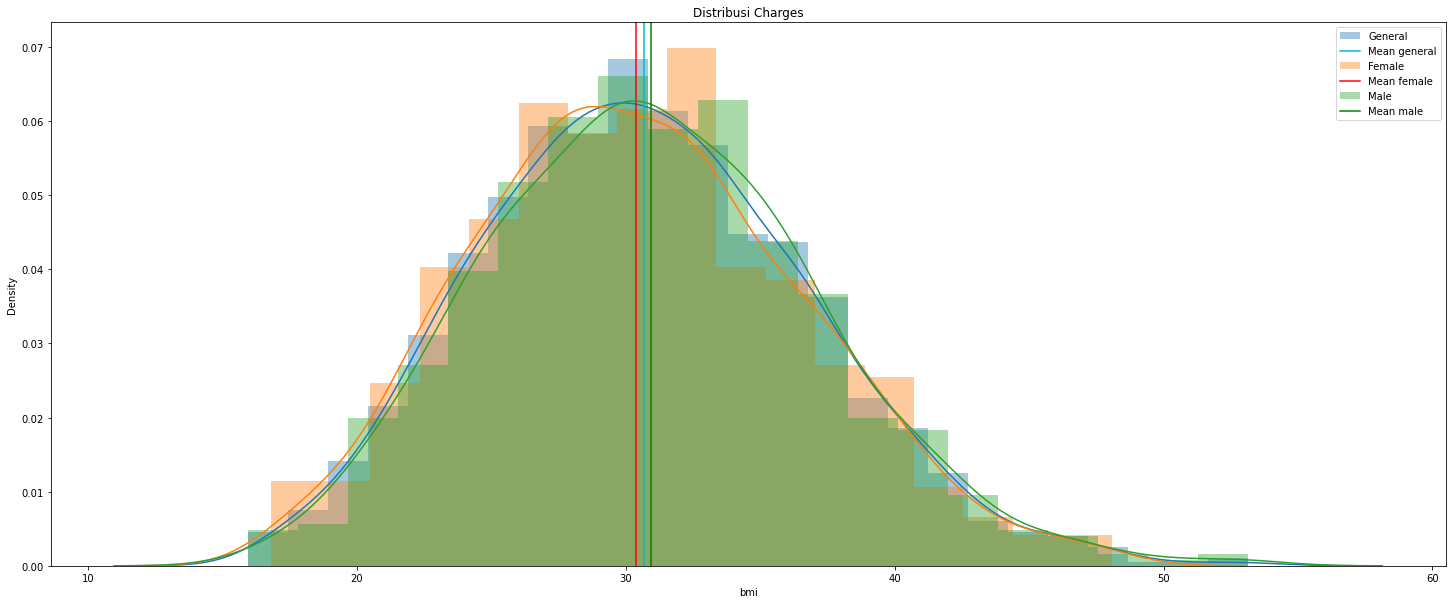

In [13]:
mean_female = df[df.sex=='female']['bmi'].mean()
mean_male  = df[df.sex=='male']['bmi'].mean()

fig = plt.subplots(figsize=(25,10))
sns.distplot(df['bmi'],label='General')
plt.axvline(df['bmi'].mean(),linestyle='-',color='c',label='Mean general')
sns.distplot(df[df.sex=='female']['bmi'],label='Female')
plt.axvline(mean_female,linestyle='-',color='r',label='Mean female')
sns.distplot(df[df.sex=='male']['bmi'],label='Male')
plt.axvline(mean_male,linestyle='-',color='g',label='Mean male')
plt.title('Distribusi Charges')
plt.legend()

print(f"Mean female : {round(mean_female,2)}")
print(f"Mean male   : {round(mean_male,2)}")
if mean_female > mean_male:
    print(":. Mean BMI female lebih besar dari mean BMI male")
else:
    print(":. Mean BMI female lebih kecil dari mean BMI male")

:. Dikarenakan plot menunjukan symmetrical distribution, maka mean BMI dari kedua kelompok yang diperbandingkan, dan Mean BMI Male lebih tinggi

## 10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

Mean BMI Perokok     : 30.71
Mean BMI Non-Perokok : 30.65
:. Mean BMI Perokok lebih besar dari mean BMI Non-Perokok


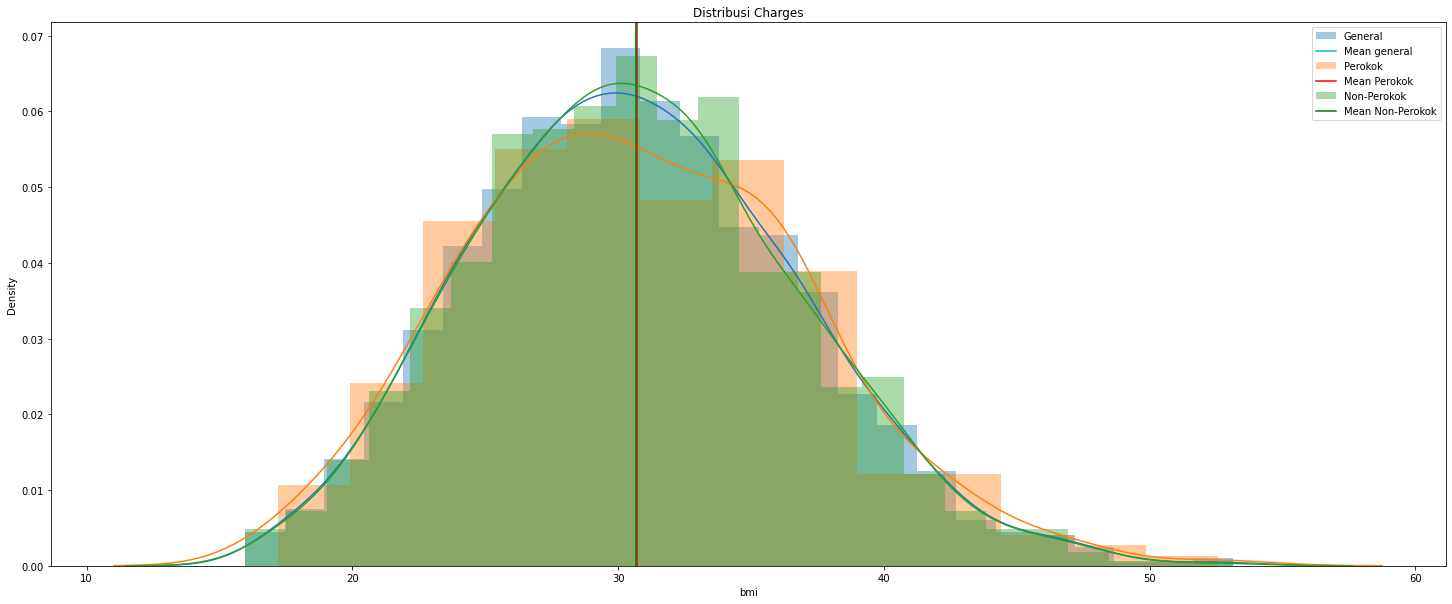

In [14]:
meanBMIperokok     = df[df.smoker=='yes']['bmi'].mean()
meanBMInonperokok  = df[df.smoker=='no']['bmi'].mean()

fig = plt.subplots(figsize=(25,10))
sns.distplot(df['bmi'],label='General')
plt.axvline(df['bmi'].mean(),linestyle='-',color='c',label='Mean general')
sns.distplot(df[df.smoker=='yes']['bmi'],label='Perokok')
plt.axvline(meanBMIperokok,linestyle='-',color='r',label='Mean Perokok')
sns.distplot(df[df.smoker=='no']['bmi'],label='Non-Perokok')
plt.axvline(meanBMInonperokok,linestyle='-',color='g',label='Mean Non-Perokok')
plt.title('Distribusi Charges')
plt.legend()

print(f"Mean BMI Perokok     : {round(meanBMIperokok,2)}")
print(f"Mean BMI Non-Perokok : {round(meanBMInonperokok,2)}")
if meanBMIperokok > meanBMInonperokok:
    print(":. Mean BMI Perokok lebih besar dari mean BMI Non-Perokok")
else:
    print(":. Mean BMI Perokok lebih kecil dari mean BMI Non-Perokok")

:. Dikarenakan plot menunjukan symmetrical distribution, maka mean BMI dari kedua kelompok yang diperbandingkan, dan Mean BMI Perokok lebih tinggi

# Langkah #2 - Analisa Variabel Kategorik (PMF)

## 1. Gender mana yang memiliki tagihan paling tinggi?

Median female : 9412.96
Median male   : 9369.62
:. Median female lebih besar dari median male


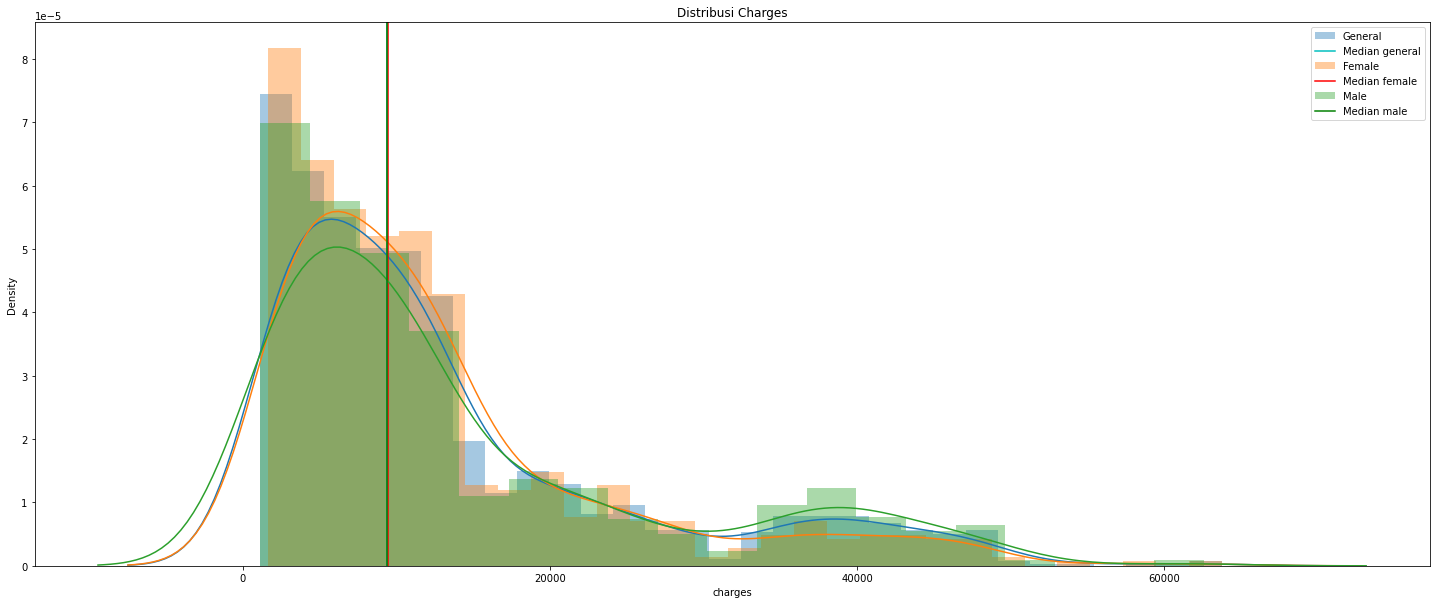

In [15]:
median_female = df[df.sex=='female']['charges'].median()
median_male   = df[df.sex=='male']['charges'].median()

fig = plt.subplots(figsize=(25,10))
sns.distplot(df['charges'],label='General')
plt.axvline(df['charges'].median(),linestyle='-',color='c',label='Median general')
sns.distplot(df[df.sex=='female']['charges'],label='Female')
plt.axvline(median_female,linestyle='-',color='r',label='Median female')
sns.distplot(df[df.sex=='male']['charges'],label='Male')
plt.axvline(median_male,linestyle='-',color='g',label='Median male')
plt.title('Distribusi Charges')
plt.legend()

print(f"Median female : {round(median_female,2)}")
print(f"Median male   : {round(median_male,2)}")
if median_female > median_male:
    print(":. Median female lebih besar dari median male")
else:
    print(":. Median female lebih kecil dari median male")

:. Dikarenakan plot menunjukan left-skewed distribution, maka median BMI dari kedua kelompok yang diperbandingkan, dan Mean BMI Male lebih tinggi

## 2. Distribusi peluang tagihan di tiap-tiap region

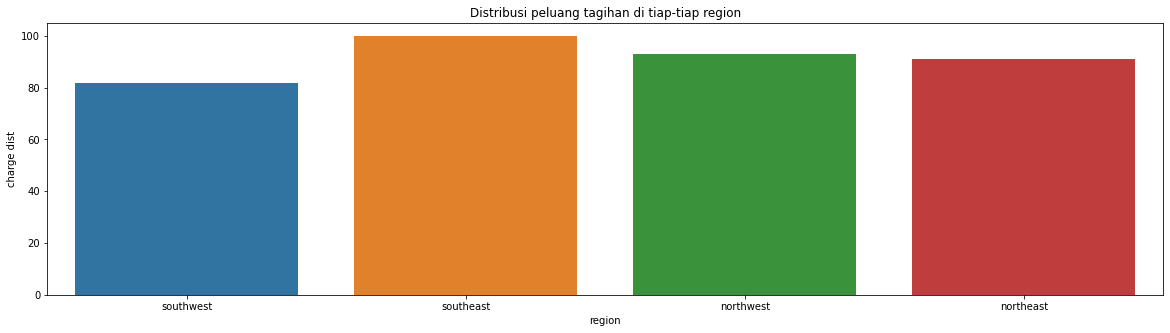

      region  charge dist
0  southwest         82.0
1  southeast        100.0
2  northwest         93.0
3  northeast         91.0


In [16]:
dist_charge_reg_list = []

for i in df.region.unique():
    dist_charge_reg = round((max(df['charges'][df.region==i])-min(df['charges'][df.region==i]))/
                            (max(df['charges'])-min((df['charges']))),2)*100
    dist_charge_reg_list.append(dist_charge_reg)
    
reg_charge_dist = pd.DataFrame({'region':df.region.unique(),'charge dist':dist_charge_reg_list})

fig=plt.subplots(figsize=(20,5))
sns.barplot(data=reg_charge_dist,x='region',y='charge dist')
plt.title('Distribusi Peluang Tagihan di Tiap-Tiap Region')
plt.show()

print(reg_charge_dist)

## 3. Apakah setiap region memiliki proporsi data banyak orang yang sama?

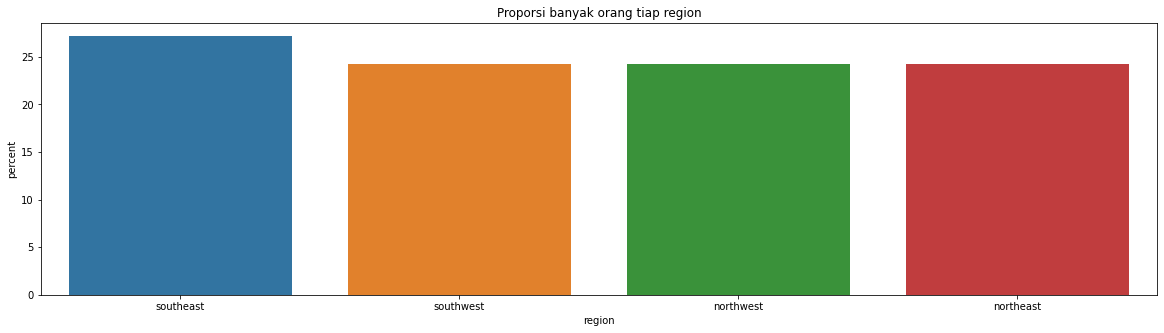

      region    percent
0  southeast  27.204783
1  southwest  24.289985
2  northwest  24.289985
3  northeast  24.215247

:. Setiap region tidak memiliki proporsi data banyak orang yang sama


In [17]:
reg_count = df.stb.freq(['region'])[['region','percent']]

fig=plt.subplots(figsize=(20,5))
sns.barplot(data=reg_count,x='region',y='percent')
plt.title('Proporsi Banyak Orang Tiap Region')
plt.show()

print(reg_count)

print('\n:. Setiap region tidak memiliki proporsi data banyak orang yang sama')

## 4. Mana yang lebih tinggi proporsi perokok atau non perokok?

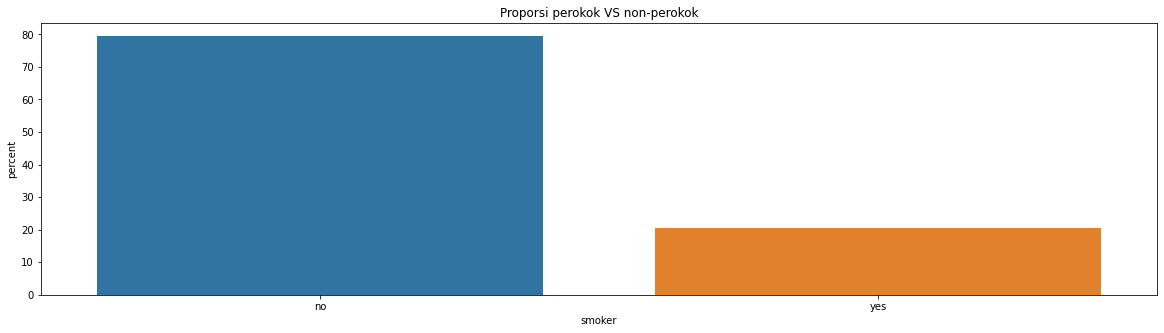

  smoker    percent
0     no  79.521674
1    yes  20.478326

:. Lebih tinggi proporsi non perokok


In [18]:
smoke_dist = df.stb.freq(['smoker'])[['smoker','percent']]

fig=plt.subplots(figsize=(20,5))
sns.barplot(data=smoke_dist,x='smoker',y='percent')
plt.title('Proporsi Perokok VS Non-Perokok')
plt.show()

print(smoke_dist)

print('\n:. Lebih tinggi proporsi non perokok')

## 5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

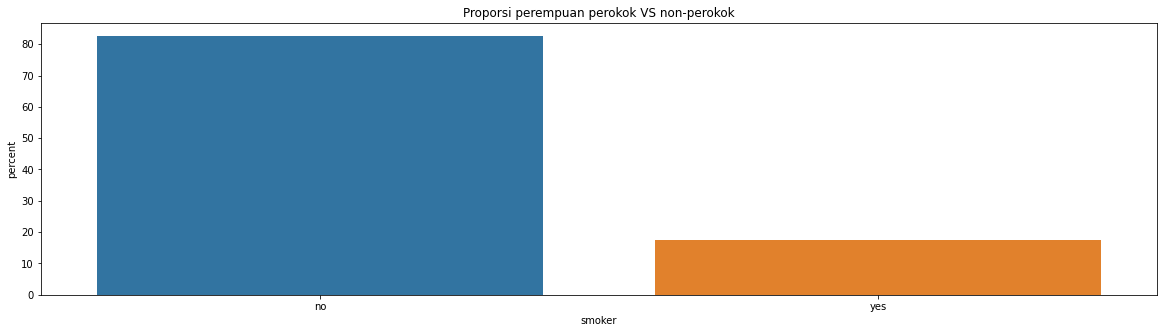


Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok: 17.37%


In [19]:
sex_smoke_dist = df[df.sex=='female'].stb.freq(['sex','smoker'])[['sex','smoker','percent']]

fig=plt.subplots(figsize=(20,5))
sns.barplot(data=sex_smoke_dist,x='smoker',y='percent')
plt.title('Proporsi Perempuan Perokok VS Non-Perokok')
plt.show()

print(f'\nPeluang seseorang tersebut adalah perempuan diketahui dia adalah perokok: {round(sex_smoke_dist.iloc[1,2],2)}%')

## 6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

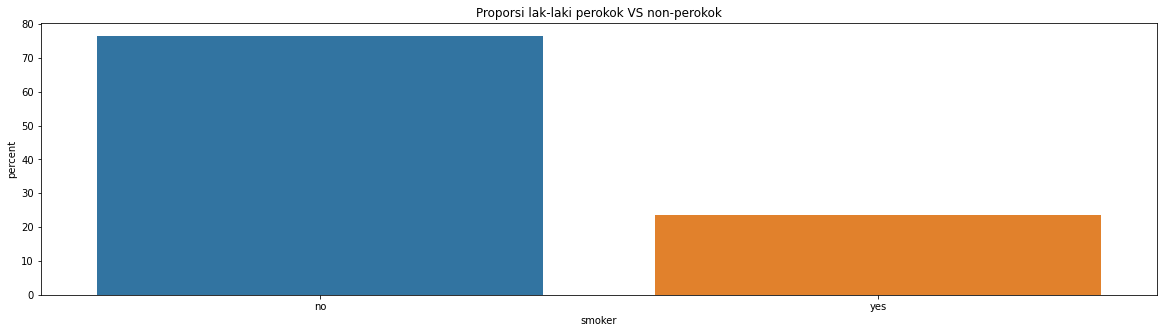


Peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok: 23.52%


In [20]:
df[df.sex=='male'].stb.freq(['smoker','sex'])

smoke_male_dist = df[df.sex=='male'].stb.freq(['smoker','sex'])[['smoker','sex','percent']]

fig=plt.subplots(figsize=(20,5))
sns.barplot(data=smoke_male_dist,x='smoker',y='percent')
plt.title('Proporsi lak-laki perokok VS non-perokok')
plt.show()

print(f'\nPeluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok: {round(smoke_male_dist.iloc[1,2],2)}%')

## 7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

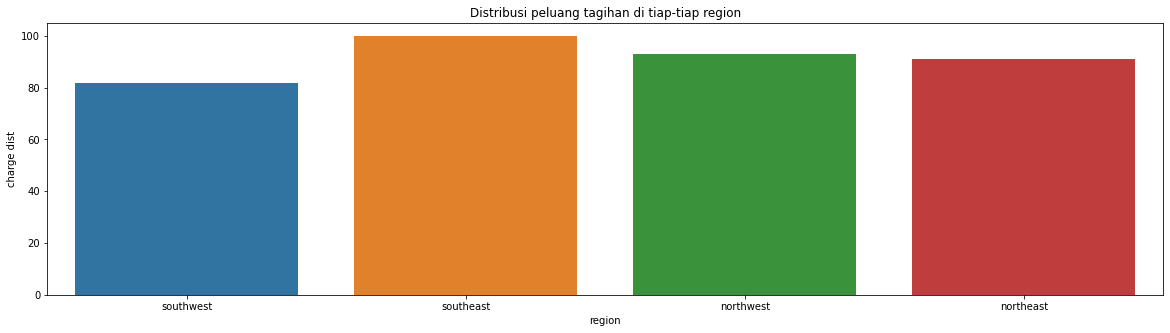

      region  charge dist
0  southwest         82.0
1  southeast        100.0
2  northwest         93.0
3  northeast         91.0


In [21]:
dist_charge_reg_list = []

for i in df.region.unique():
    dist_charge_reg = round((max(df['charges'][df.region==i])-min(df['charges'][df.region==i]))/
                            (max(df['charges'])-min((df['charges']))),2)*100
    dist_charge_reg_list.append(dist_charge_reg)
    
reg_charge_dist = pd.DataFrame({'region':df.region.unique(),'charge dist':dist_charge_reg_list})

fig=plt.subplots(figsize=(20,5))
sns.barplot(data=reg_charge_dist,x='region',y='charge dist')
plt.title('Distribusi Peluang Tagihan di Tiap-Tiap Region')
plt.show()

print(reg_charge_dist)

# Langkah #3 - Analisa Variabel Kontinu

## 1. Mana yang lebih mungkin terjadi

> a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
atau

>b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas
16.7k

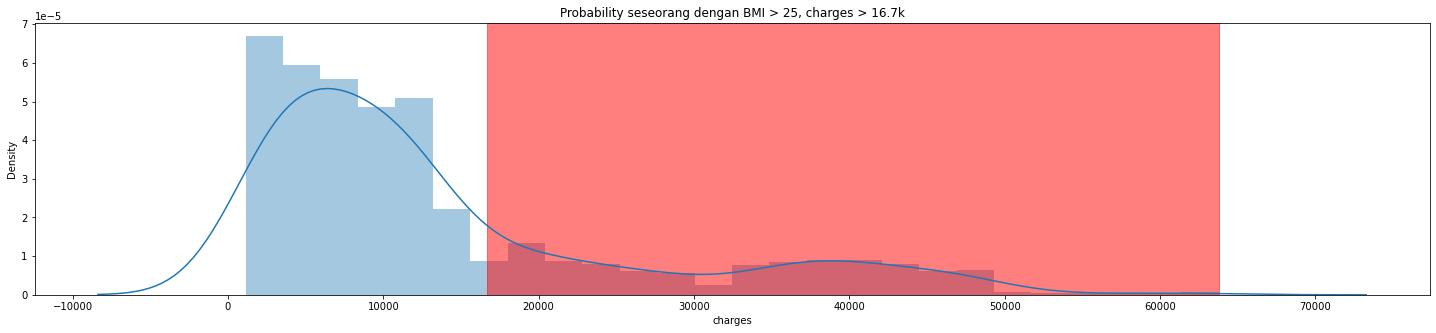

Probability seseorang dengan BMI > 25, charges > 16.7k count: 75.0%





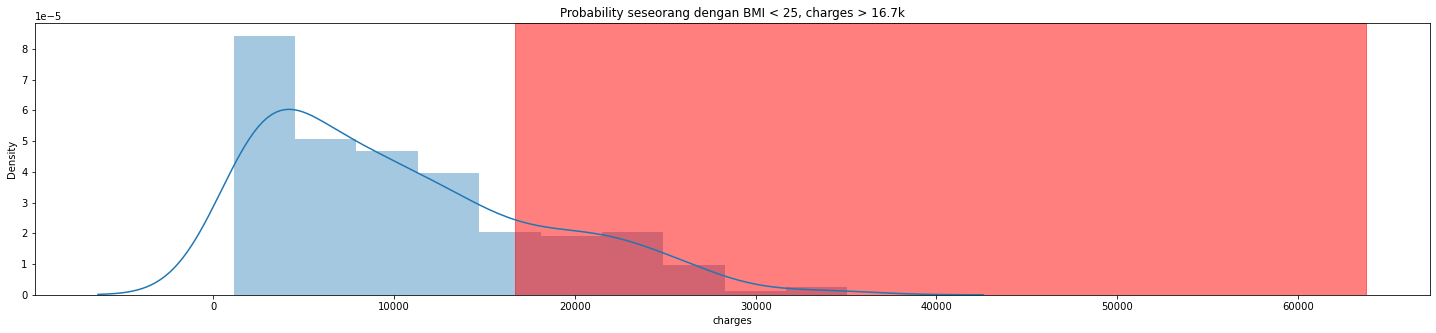

Probability seseorang dengan BMI < 25, charges > 16.7k count: 54.0%




:. Probability bmi > 25, charges > 16.7k "lebih besar" dari probability bmi < 25, charges > 16.7k






In [22]:
# Seseorang dengan BMI > 25, charges > 16.7k
fig,ax = plt.subplots(1,1,figsize=(25,5))
sns.distplot(df[df.bmi>25]['charges'])
ax.axvspan(16700,max(df.charges),alpha=0.5,color='red')
plt.title('Probability Seseorang Dengan BMI > 25, Charges > 16.7k')
plt.show()
prob1 = round((max(df[df.bmi>25].charges)-
               16700)/
              (max(df[df.bmi>25].charges)-
               min(df[df.bmi>25].charges)),2)*100
print(f'Probability seseorang dengan BMI > 25, charges > 16.7k count: {prob1}%')

print('\n\n')

# Seseorang dengan BMI < 25, charges > 16.7k
fig,ax = plt.subplots(1,1,figsize=(25,5))
sns.distplot(df[df.bmi<25]['charges'])
ax.axvspan(16700,max(df.charges),alpha=0.5,color='red')
plt.title('Probability Seseorang Dengan BMI < 25, Charges > 16.7k')
plt.show()
prob2 = round((max(df[df.bmi<25].charges)-
               16700)/
              (max(df[df.bmi<25].charges)
               -min(df[df.bmi<25].charges)),2)*100
print(f'Probability seseorang dengan BMI < 25, charges > 16.7k count: {prob2}%')

print('\n\n\n')

if prob1 > prob2:
    print(':. Probability bmi > 25, charges > 16.7k "lebih besar" dari probability bmi < 25, charges > 16.7k')
else:
    print(':. Probability bmi > 25, charges > 16.7k "lebih kecil" dari probability bmi < 25, charges > 16.7k')
    
print('\n\n\n')

## 2. Mana yang lebih mungkin terjadi

>a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, atau

>b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

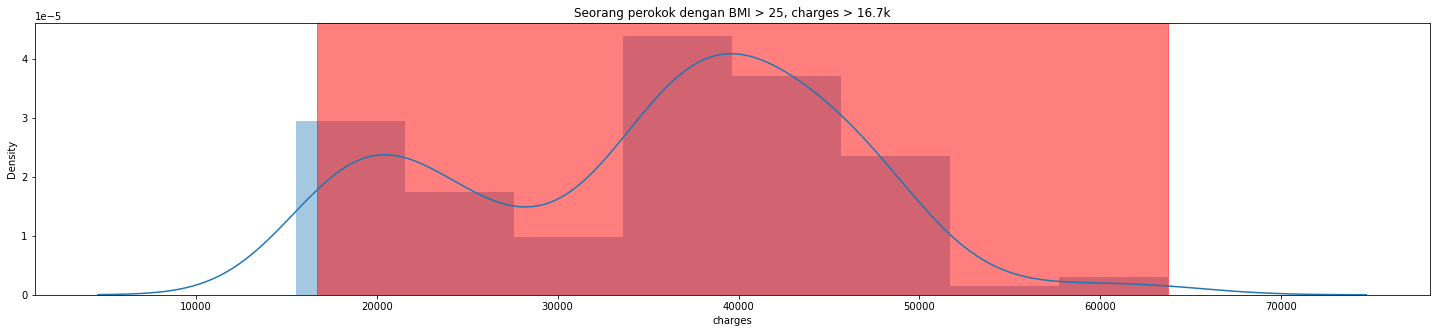

Seorang perokok dengan BMI > 25, charges > 16.7k count: 83.0%





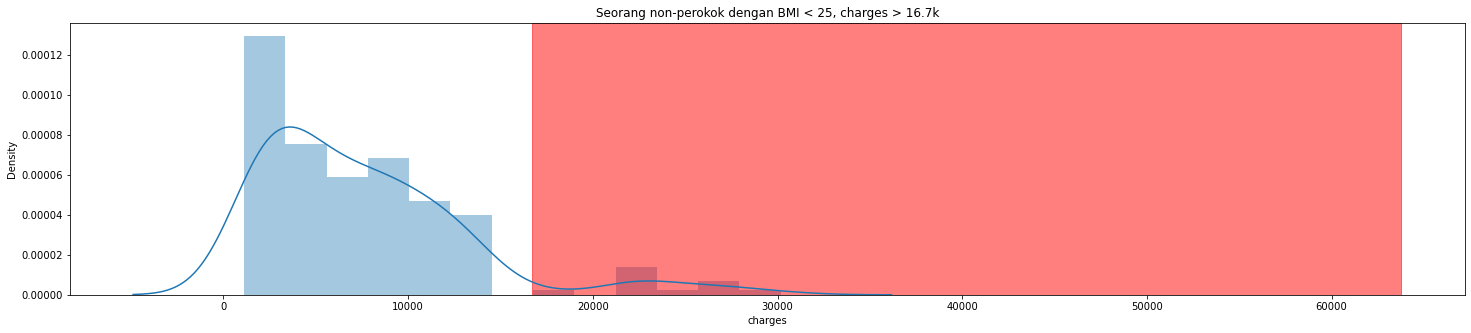

Seorang non-perokok dengan BMI > 25, charges > 16.7k count: 46.0%




:. Probability perokok bmi > 25, charges > 16.7k "lebih besar" dari probability non-perokok bmi > 25, charges > 16.7k






In [23]:
# Seorang perokok dengan BMI > 25, charges > 16.7k
fig,ax = plt.subplots(1,1,figsize=(25,5))
sns.distplot(df[(df.smoker=='yes')&(df.bmi>25)]['charges'])
ax.axvspan(16700,max(df.charges),alpha=0.5,color='red')
plt.title('Seorang Perokok Dengan BMI > 25, Charges > 16.7k')
plt.show()
p1 = round((max(df[(df.smoker=='yes')&(df.bmi<25)].charges)-
            16700)/
           (max(df[(df.smoker=='yes')&(df.bmi<25)].charges)-
            min(df[(df.smoker=='yes')&(df.bmi<25)].charges)),2)*100
print(f'Seorang perokok dengan BMI > 25, charges > 16.7k count: {p1}%')

print('\n\n')

# Seorang non-perokok dengan BMI < 25, charges > 16.7k
fig,ax = plt.subplots(1,1,figsize=(25,5))
sns.distplot(df[(df.smoker=='no')&(df.bmi<25)]['charges'])
ax.axvspan(16700,max(df.charges),alpha=0.5,color='red')
plt.title('Seorang Non-Perokok Dengan BMI < 25, Charges > 16.7k')
plt.show()
p2 = round((max(df[(df.smoker=='no')&(df.bmi<25)].charges)-
            16700)/
           (max(df[(df.smoker=='no')&(df.bmi<25)].charges)-
            min(df[(df.smoker=='no')&(df.bmi<25)].charges)),2)*100
print(f'Seorang non-perokok dengan BMI > 25, charges > 16.7k count: {p2}%')

print('\n\n\n')

if p1 > p2:
    print(':. Probability perokok bmi > 25, charges > 16.7k "lebih besar" dari probability non-perokok bmi > 25, charges > 16.7k')
else:
    print(':. Probability perokok bmi > 25, charges > 16.7k "lebih kecil" dari probability non-perokok bmi > 25, charges > 16.7k')
    
print('\n\n\n')

# Langkah #4 - Analisa Korelasi Variabel

In [24]:
dfn = df.copy()

dfn['sex'][dfn.sex=='female']=0
dfn['sex'][dfn.sex=='male']=1
dfn['sex'] = dfn['sex'].astype('int64')
dfn['smoker'][dfn.smoker=='no']=0
dfn['smoker'][dfn.smoker=='yes']=1
dfn['smoker'] = dfn['smoker'].astype('int64')
dfn['region'][dfn.region=='southwest']=0
dfn['region'][dfn.region=='southeast']=1
dfn['region'][dfn.region=='northwest']=2
dfn['region'][dfn.region=='northeast']=3
dfn['region'] = dfn['region'].astype('int64')
dfn

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


[]

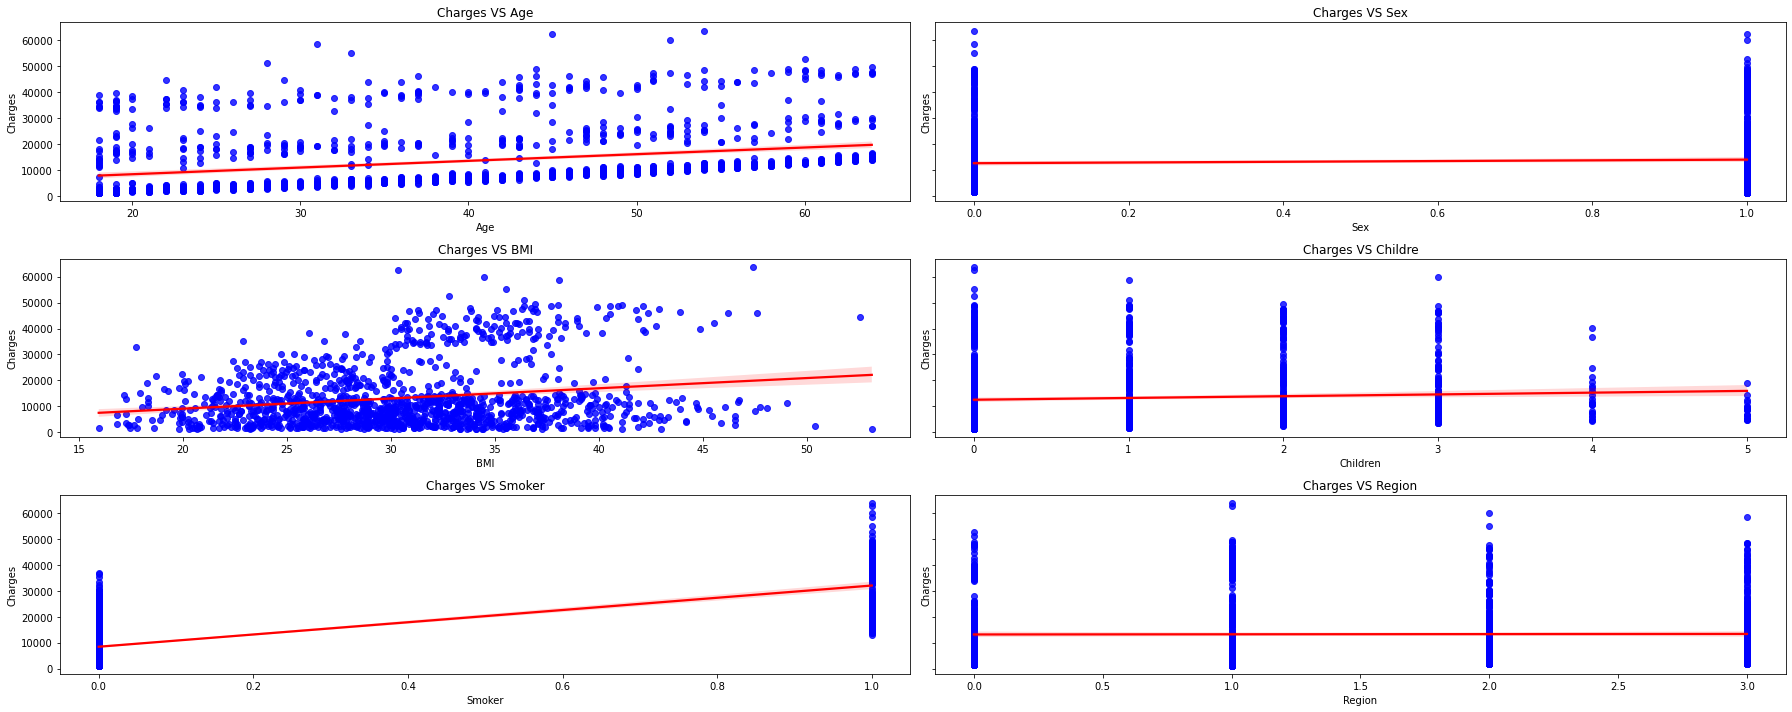

In [25]:
fig,axs=plt.subplots(3,2,sharey=True,figsize=(25,10))
axs[0,0].set_title('Charges VS Age')
sns.regplot(ax=axs[0,0],data=dfn,x='age',y='charges',scatter_kws={'color':'blue'},line_kws={'color':'red'})
axs[0,0].set_xlabel('Age')
axs[0,0].set_ylabel('Charges')

axs[0,1].set_title('Charges VS Sex')
sns.regplot(ax=axs[0,1],data=dfn,x='sex',y='charges',scatter_kws={'color':'blue'},line_kws={'color':'red'})
axs[0,1].set_xlabel('Sex')
axs[0,1].set_ylabel('Charges')

axs[1,0].set_title('Charges VS BMI')
sns.regplot(ax=axs[1,0],data=dfn,x='bmi',y='charges',scatter_kws={'color':'blue'},line_kws={'color':'red'})
axs[1,0].set_xlabel('BMI')
axs[1,0].set_ylabel('Charges')

axs[1,1].set_title('Charges VS Childre')
sns.regplot(ax=axs[1,1],data=dfn,x='children',y='charges',scatter_kws={'color':'blue'},line_kws={'color':'red'})
axs[1,1].set_xlabel('Children')
axs[1,1].set_ylabel('Charges')

axs[2,0].set_title('Charges VS Smoker')
sns.regplot(ax=axs[2,0],data=dfn,x='smoker',y='charges',scatter_kws={'color':'blue'},line_kws={'color':'red'})
axs[2,0].set_xlabel('Smoker')
axs[2,0].set_ylabel('Charges')
    
axs[2,1].set_title('Charges VS Region')
sns.regplot(ax=axs[2,1],data=dfn,x='region',y='charges',scatter_kws={'color':'blue'},line_kws={'color':'red'})
axs[2,1].set_xlabel('Region')
axs[2,1].set_ylabel('Charges')

fig.tight_layout()
plt.plot()

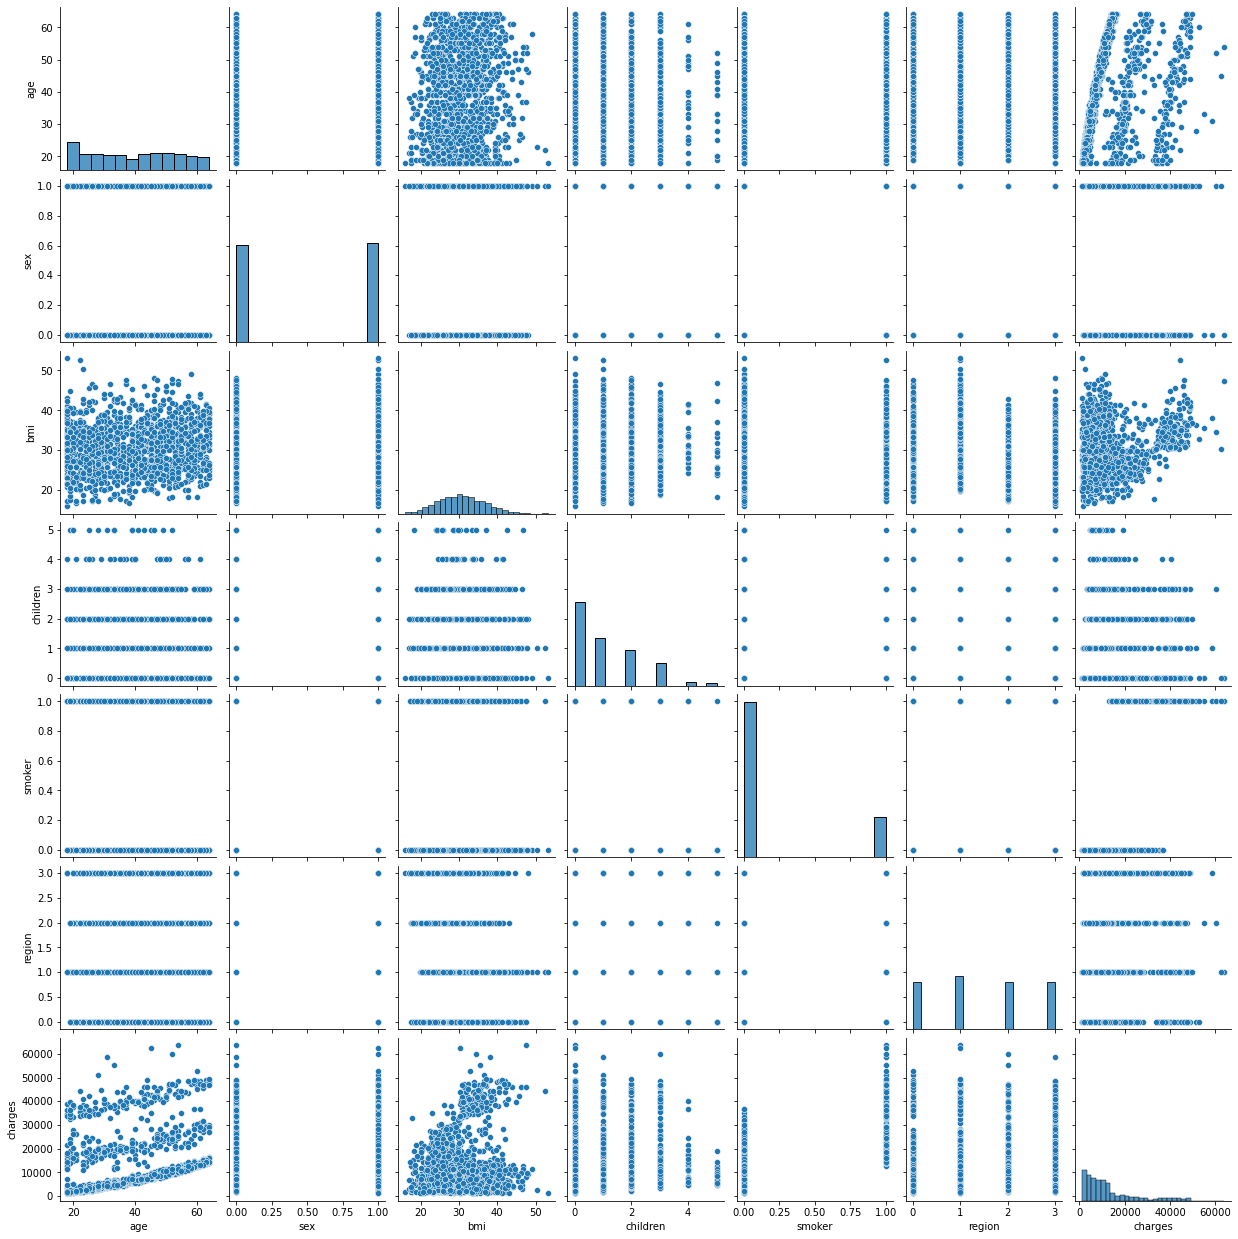

In [26]:
sns.pairplot(dfn)
plt.show()

In [27]:
print(f'Correlation antara "charges" dan "age":\n--> {round(correlation(dfn,dfn["charges"],dfn["age"]),2)}')
print(f'Correlation antara "charges" dan "sex":\n--> {round(correlation(dfn,dfn["charges"],dfn["sex"]),3)}')
print(f'Correlation antara "charges" dan "bmi":\n--> {round(correlation(dfn,dfn["charges"],dfn["bmi"]),2)}')
print(f'Correlation antara "charges" dan "children":\n--> {round(correlation(dfn,dfn["charges"],dfn["children"]),3)}')
print(f'Correlation antara "charges" dan "smoker":\n--> {round(correlation(dfn,dfn["charges"],dfn["smoker"]),2)}')
print(f'Correlation antara "charges" dan "region":\n--> {round(correlation(dfn,dfn["charges"],dfn["region"]),4)}')

Correlation antara "charges" dan "age":
--> 0.3
Correlation antara "charges" dan "sex":
--> 0.057
Correlation antara "charges" dan "bmi":
--> 0.2
Correlation antara "charges" dan "children":
--> 0.068
Correlation antara "charges" dan "smoker":
--> 0.79
Correlation antara "charges" dan "region":
--> 0.0062


<AxesSubplot:>

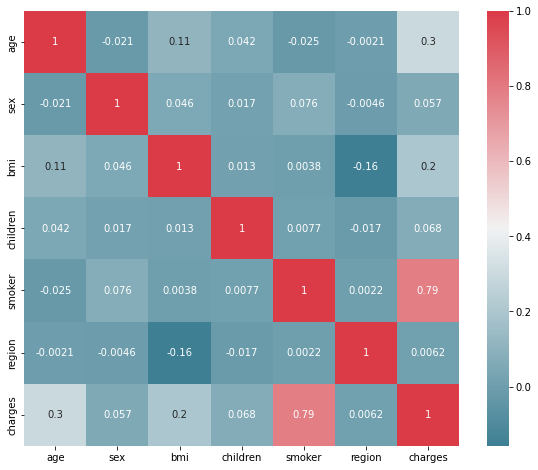

In [28]:
f,ax=plt.subplots(figsize=(10,8))
corrmat = dfn.corr()
sns.heatmap(corrmat,annot=True,mask=np.zeros_like(corrmat,dtype=np.bool),
            cmap=sns.diverging_palette(220,10,as_cmap=True),
            square=True,ax=ax)

# Langkah #5 - Pengujian Hipotesis

## 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

H0 : smoker_charges < non_smoker_charges

H1 : smoker_charges > non_smoker_charges

In [30]:
smoker_charge              = df['charges'][df['smoker']=='yes']
nonsmoker_charge           = df['charges'][df['smoker']=='no']
samp_smoker_charge_med     = int(smoker_charge.sample(n=30).median())
samp_nonsmoker_charge_med  = int(nonsmoker_charge.sample(n=30).median())
tot_smoker_charge_med      = int(smoker_charge.median())
tot_nonsmoker_charge_med   = int(nonsmoker_charge.median())

samp_median_array = np.array([samp_nonsmoker_charge_med,
                              samp_smoker_charge_med])
tot_median_array  = np.array([tot_nonsmoker_charge_med,
                              tot_smoker_charge_med])

In [31]:
(test_stat,p_value) = proportions_ztest(count=samp_median_array,
                                        nobs=tot_median_array,
                                        alternative='larger')
print("The computed Z test statistic is : ",test_stat)
print("The p-value is                   : ",p_value)

The computed Z test statistic is :  nan
The p-value is                   :  nan


In [32]:
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


Accepting the Null Hypothesis


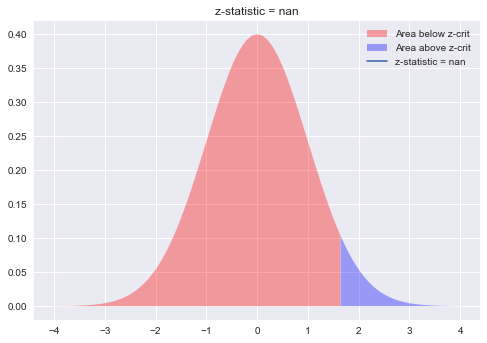

In [33]:
plt.style.use('seaborn')

plt.fill_between(x=np.arange(-4,1.645,0.01),
                 y1=stats.norm.pdf(np.arange(-4,1.645,0.01)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area below z-crit')

plt.fill_between(x=np.arange(1.645,4,0.01),
                 y1=stats.norm.pdf(np.arange(1.645,4,0.01)),
                 facecolor='blue',
                 alpha=0.35,
                 label='Area above z-crit')
plt.axvline(test_stat,label=f'z-statistic = {test_stat:.2f}')
plt.legend()
plt.title(f'z-statistic = {test_stat:.2f}')

if p_value > 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Accepting the Null Hypothesis')

## 2. Proporsi perokok laki laki lebih besar dari perempuan

H0 : male_charges < female_charges

H1 : male_charges > female_charges

In [34]:
male_smoker              = df['sex'][(df['sex']=='male')&(df['smoker']=='yes')]
female_smoker            = df['sex'][(df['sex']=='female')&(df['smoker']=='yes')]
samp_male_smoker_count   = int(male_smoker.sample(n=30).count())
samp_female_smoker_count = int(female_smoker.sample(n=30).count())
tot_male_smoker_count    = int(male_smoker.count())
tot_female_smoker_count  = int(female_smoker.count())

samp_median_array = np.array([samp_female_smoker_count,
                              samp_male_smoker_count])
tot_median_array  = np.array([tot_female_smoker_count,
                              tot_male_smoker_count])

In [35]:
(test_stat,p_value) = proportions_ztest(count=samp_median_array,
                                        nobs=tot_median_array,
                                        alternative='larger')
print("The computed Z test statistic is : ",test_stat)
print("The p-value is                   : ",p_value)

The computed Z test statistic is :  1.4259989916310232
The p-value is                   :  0.07693431656286959


In [36]:
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


Reject the Null Hypothesis


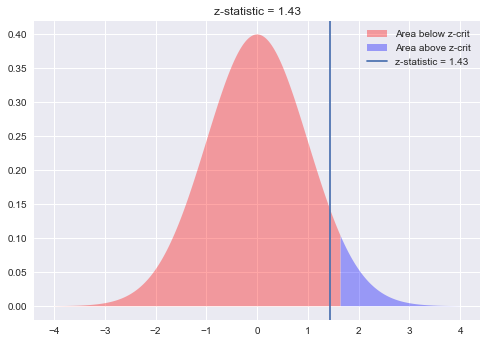

In [37]:
plt.style.use('seaborn')

plt.fill_between(x=np.arange(-4,1.645,0.01),
                 y1=stats.norm.pdf(np.arange(-4,1.645,0.01)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area below z-crit')

plt.fill_between(x=np.arange(1.645,4,0.01),
                 y1=stats.norm.pdf(np.arange(1.645,4,0.01)),
                 facecolor='blue',
                 alpha=0.35,
                 label='Area above z-crit')
plt.axvline(test_stat,label=f'z-statistic = {test_stat:.2f}')
plt.legend()
plt.title(f'z-statistic = {test_stat:.2f}')

if p_value > 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Accepting the Null Hypothesis')

## 3. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

H0 : bmi_over_25_charge < bmi_under_25_charge

H1 : bmi_over_25_charge > bmi_under_25_charge

In [38]:
bmi_over_25_charge             = df['charges'][df['bmi']>25]
bmi_under_25_charge            = df['charges'][df['bmi']<25]
samp_bmi_over_25_charge_count  = int(bmi_over_25_charge.sample(n=30).count())
samp_bmi_under_25_charge_count = int(bmi_under_25_charge.sample(n=30).count())
tot_bmi_over_25_charge_count   = int(bmi_over_25_charge.count())
tot_bmi_under_25_charge_count  = int(bmi_under_25_charge.count())

samp_median_array = np.array([samp_bmi_under_25_charge_count,
                              samp_bmi_over_25_charge_count])
tot_median_array  = np.array([tot_bmi_under_25_charge_count,
                              tot_bmi_over_25_charge_count])

In [39]:
(test_stat,p_value) = proportions_ztest(count=samp_median_array,
                                        nobs=tot_median_array,
                                        alternative='larger')
print("The computed Z test statistic is : ",test_stat)
print("The p-value is                   : ",p_value)

The computed Z test statistic is :  6.484828080363101
The p-value is                   :  4.4416510192749395e-11


In [40]:
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


Accepting the Null Hypothesis


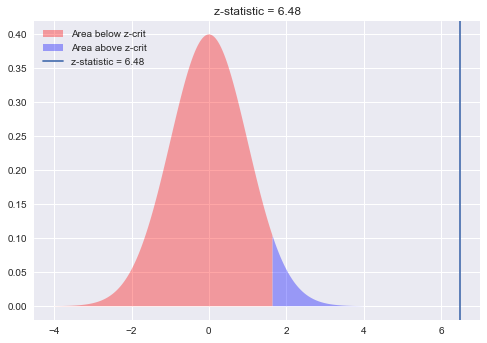

In [41]:
plt.style.use('seaborn')

plt.fill_between(x=np.arange(-4,1.645,0.01),
                 y1=stats.norm.pdf(np.arange(-4,1.645,0.01)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area below z-crit')

plt.fill_between(x=np.arange(1.645,4,0.01),
                 y1=stats.norm.pdf(np.arange(1.645,4,0.01)),
                 facecolor='blue',
                 alpha=0.35,
                 label='Area above z-crit')
plt.axvline(test_stat,label=f'z-statistic = {test_stat:.2f}')
plt.legend()
plt.title(f'z-statistic = {test_stat:.2f}')

if p_value > 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Accepting the Null Hypothesis')

## 4. Tagihan kesehatan laki-laki lebih besar dari perempuan

H0 : male_charges < female_charges

H1 : male_charges > female_charges

In [42]:
male_charges              = df['charges'][df['sex']=='male']
female_charges            = df['charges'][df['sex']=='female']
samp_male_charges_count   = int(male_charges.sample(n=30).count())
samp_female_charges_count = int(female_charges.sample(n=30).count())
tot_male_charges_count    = int(male_charges.count())
tot_female_charges_count  = int(female_charges.count())

samp_median_array = np.array([samp_female_charges_count,
                              samp_male_charges_count])
tot_median_array  = np.array([tot_female_charges_count,
                              tot_male_charges_count])

In [43]:
(test_stat,p_value) = proportions_ztest(count=samp_median_array,
                                        nobs=tot_median_array,
                                        alternative='larger')
print("The computed Z test statistic is : ",test_stat)
print("The p-value is                   : ",p_value)

The computed Z test statistic is :  0.08293425587534185
The p-value is                   :  0.46695190780257534


In [44]:
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


Reject the Null Hypothesis


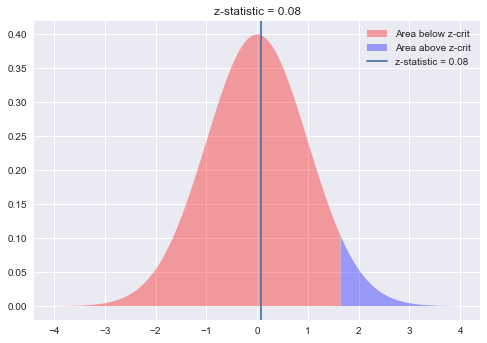

In [45]:
plt.style.use('seaborn')

plt.fill_between(x=np.arange(-4,1.645,0.01),
                 y1=stats.norm.pdf(np.arange(-4,1.645,0.01)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area below z-crit')

plt.fill_between(x=np.arange(1.645,4,0.01),
                 y1=stats.norm.pdf(np.arange(1.645,4,0.01)),
                 facecolor='blue',
                 alpha=0.35,
                 label='Area above z-crit')
plt.axvline(test_stat,label=f'z-statistic = {test_stat:.2f}')
plt.legend()
plt.title(f'z-statistic = {test_stat:.2f}')

if p_value > 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Accepting the Null Hypothesis')

# REPORT

## EDA

In [46]:
freq = df.stb.freq(['sex', 
                    'children', 
                    'smoker', 
                    'region'])[['sex',
                                'children',
                                'smoker',
                                'region',
                                'count',
                                'percent']].rename(columns={'percent':'PMF'})
freq['Ekspektasi'] = freq['count']*(freq['PMF']/100)

age_min_list  = []
age_mean_list = []
age_max_list  = []
age_var_list  = []
age_pdf_list  = []
bmi_min_list  = []
bmi_mean_list = []
bmi_max_list  = []
bmi_var_list  = []
bmi_pdf_list  = []
charges_min_list    = []
charges_median_list = []
charges_max_list    = []
charges_var_list    = []
charges_pdf_list    = []

for i in range(len(freq)):
    age_min = min(df['age'][(df.sex==freq.sex[i])&
                            (df.children==freq.children[i])&
                            (df.smoker==freq.smoker[i])&
                            (df.region==freq.region[i])])
    age_min_list.append(age_min)
    age_mean = df['age'][(df.sex==freq.sex[i])&
                         (df.children==freq.children[i])&
                         (df.smoker==freq.smoker[i])&
                         (df.region==freq.region[i])].mean()
    age_mean_list.append(age_mean)
    age_max = max(df['age'][(df.sex==freq.sex[i])&
                            (df.children==freq.children[i])&
                            (df.smoker==freq.smoker[i])&
                            (df.region==freq.region[i])])
    age_max_list.append(age_max)
    age_var = df['age'][(df.sex==freq.sex[i])&
                        (df.children==freq.children[i])&
                        (df.smoker==freq.smoker[i])&
                        (df.region==freq.region[i])].var()
    age_var_list.append(age_var)
    (age_max_list[i]-age_min_list[i])/(max(df['age'])-min(df['age']))
    age_pdf = round((age_max_list[i]-age_min_list[i])/(max(df['age'])-min(df['age'])),2)*100
    age_pdf_list.append(age_pdf)
    
    
    
    bmi_min = min(df['bmi'][(df.sex==freq.sex[i])&
                            (df.children==freq.children[i])&
                            (df.smoker==freq.smoker[i])&
                            (df.region==freq.region[i])])
    bmi_min_list.append(bmi_min)
    bmi_mean = df['bmi'][(df.sex==freq.sex[i])&
                         (df.children==freq.children[i])&
                         (df.smoker==freq.smoker[i])&
                         (df.region==freq.region[i])].mean()
    bmi_mean_list.append(bmi_mean)
    bmi_max = max(df['bmi'][(df.sex==freq.sex[i])&
                            (df.children==freq.children[i])&
                            (df.smoker==freq.smoker[i])&
                            (df.region==freq.region[i])])
    bmi_max_list.append(bmi_max)
    bmi_var = df['bmi'][(df.sex==freq.sex[i])&
                        (df.children==freq.children[i])&
                        (df.smoker==freq.smoker[i])&
                        (df.region==freq.region[i])].var()
    bmi_var_list.append(bmi_var)
    bmi_pdf = round((bmi_max_list[i]-bmi_min_list[i])/(max(df['bmi'])-min(df['bmi'])),2)*100
    bmi_pdf_list.append(bmi_pdf)
    
    
    
    charges_min = min(df['charges'][(df.sex==freq.sex[i])&
                                    (df.children==freq.children[i])&
                                    (df.smoker==freq.smoker[i])&
                                    (df.region==freq.region[i])])
    charges_min_list.append(charges_min)
    charges_median = df['charges'][(df.sex==freq.sex[i])&
                                   (df.children==freq.children[i])&
                                   (df.smoker==freq.smoker[i])&
                                   (df.region==freq.region[i])].median()
    charges_median_list.append(charges_median)
    charges_max = max(df['charges'][(df.sex==freq.sex[i])&
                            (df.children==freq.children[i])&
                            (df.smoker==freq.smoker[i])&
                            (df.region==freq.region[i])])
    charges_max_list.append(charges_max)
    charges_var = df['charges'][(df.sex==freq.sex[i])&
                                (df.children==freq.children[i])&
                                (df.smoker==freq.smoker[i])&
                                (df.region==freq.region[i])].var()
    charges_var_list.append(charges_var)
    charges_pdf = round((charges_max_list[i]-charges_min_list[i])/(max(df['charges'])-min(df['charges'])),2)*100
    charges_pdf_list.append(charges_pdf)

freq['age min']  = age_min_list
freq['age mean'] = age_mean_list
freq['age max']  = age_max_list
freq['age var']  = age_var_list
freq['age pdf']  = age_pdf_list
freq['bmi min']  = bmi_min_list
freq['bmi mean'] = bmi_mean_list
freq['bmi max']  = bmi_max_list
freq['bmi var']  = bmi_var_list
freq['bmi pdf']  = bmi_pdf_list
freq['charges min']    = charges_min_list
freq['charges median'] = charges_median_list
freq['charges max']    = charges_max_list
freq['charges var']    = charges_var_list
freq['charges pdf']    = charges_pdf_list

<AxesSubplot:>

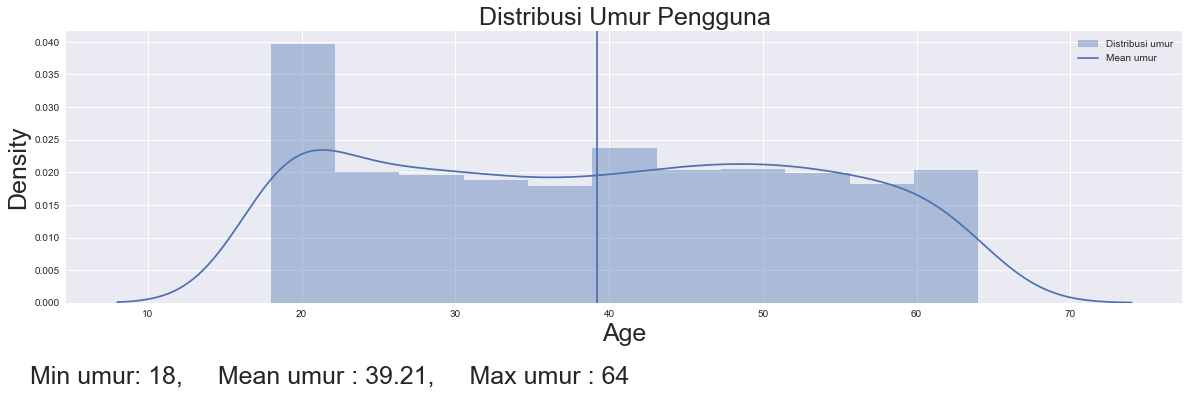

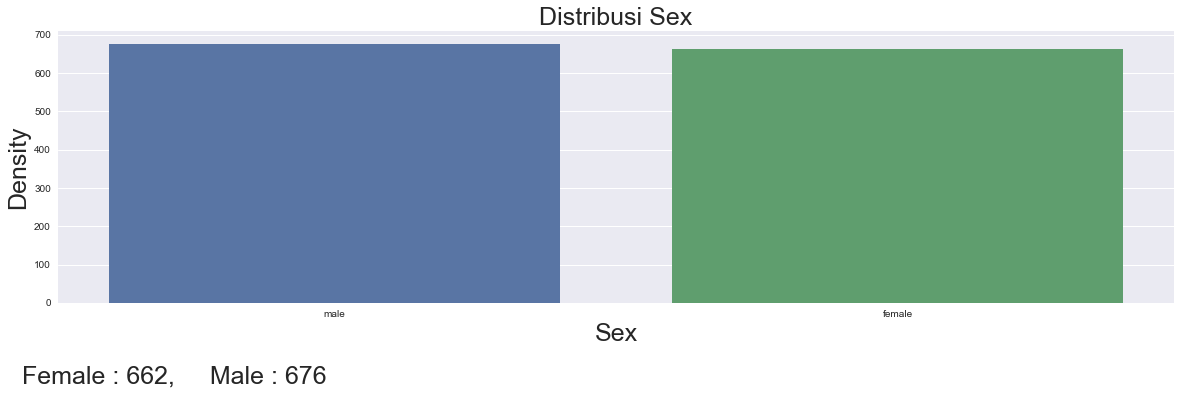

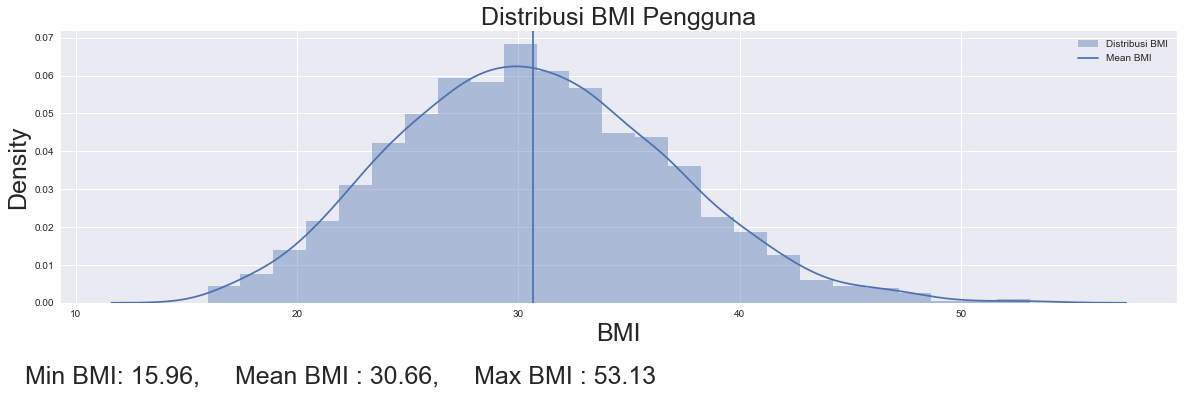

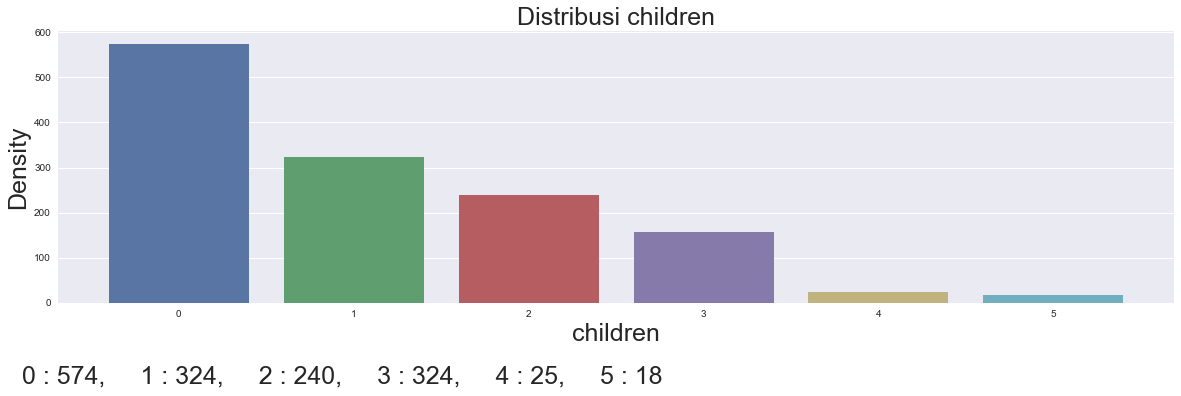

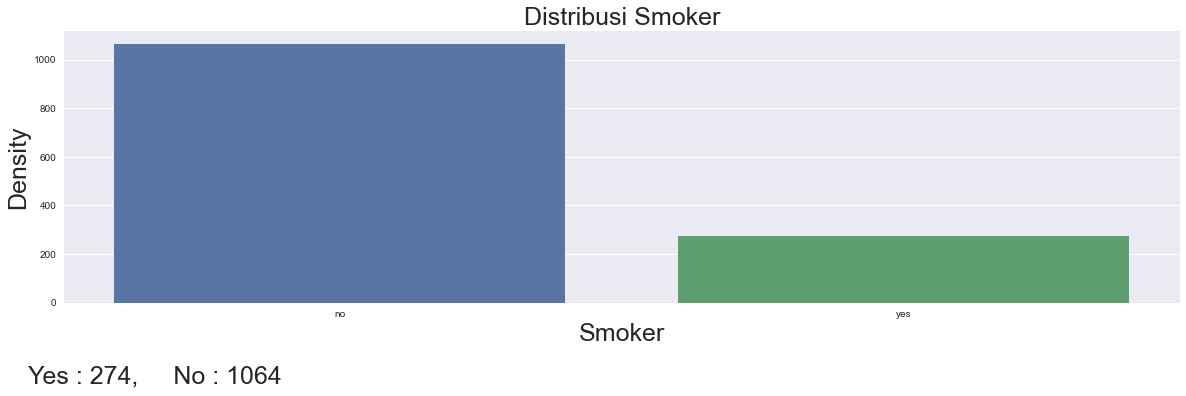

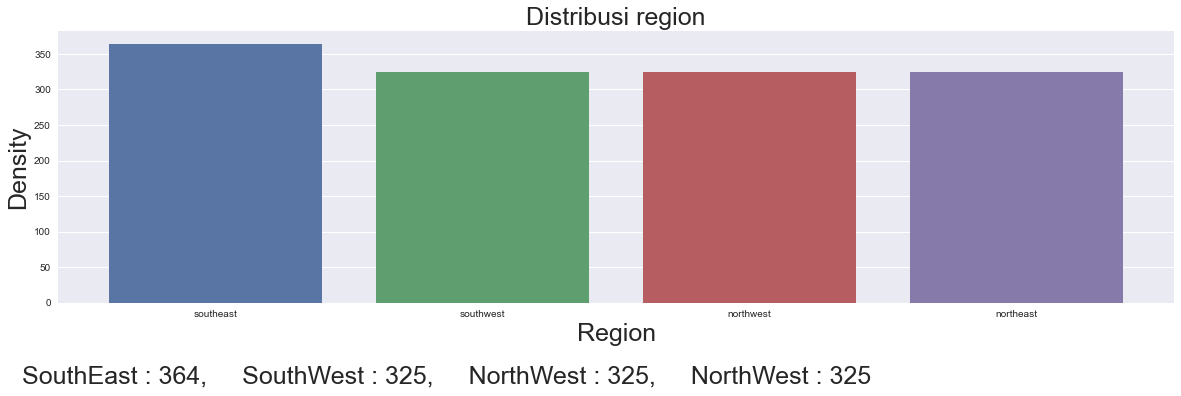

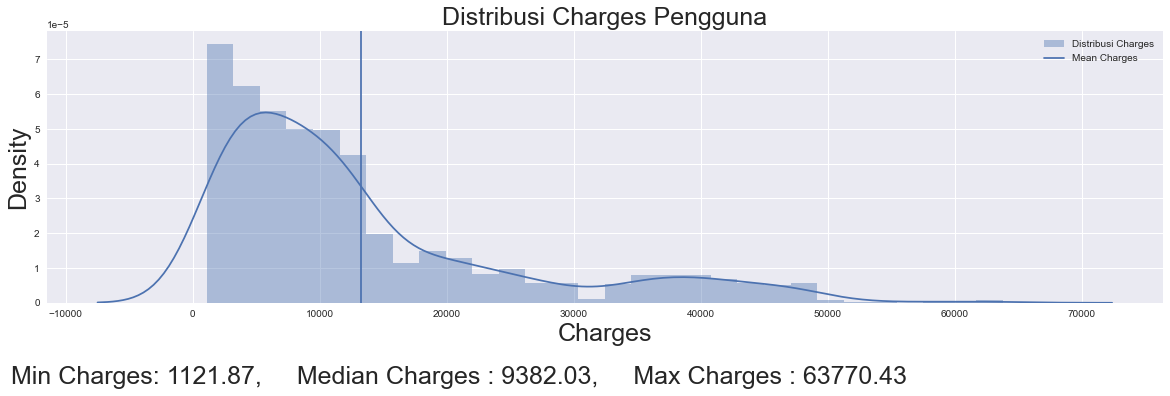

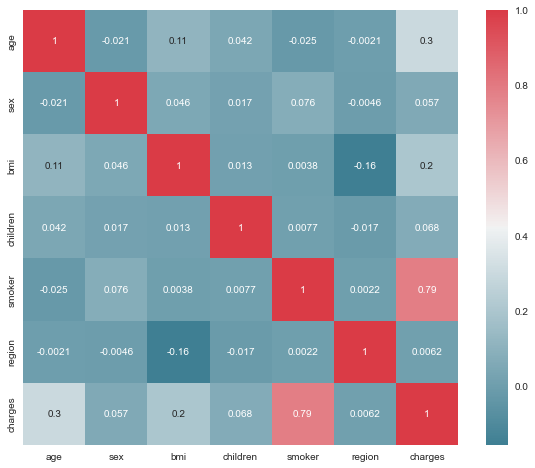

In [51]:
#Age
fig,ax=plt.subplots(figsize=(20,5))
sns.distplot(df['age'],label='Distribusi umur')
plt.axvline(df['age'].mean(), label='Mean umur')
plt.legend()
plt.title('Distribusi Umur Pengguna',fontsize=25)
plt.xlabel('Age',fontsize=25)
plt.ylabel('Density',fontsize=25)
fig.text(0.1,-0.1,f'Min umur: {round(min(df.age),2)},     Mean umur : {round(df.age.mean(),2)},     Max umur : {round(max(df.age),2)}',fontsize=25)
plt.plot()

#Sex
sex_dist = df.stb.freq(['sex'])[['sex','count']]
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=sex_dist,x='sex',y='count')
plt.title('Distribusi Sex',fontsize=25)
plt.xlabel('Sex',fontsize=25)
plt.ylabel('Density',fontsize=25)
fig.text(0.1,-0.1,f"Female : {df['sex'][df.sex=='female'].count()},     Male : {df['sex'][df.sex=='male'].count()}",fontsize=25)
plt.plot()

#BMI
fig,ax=plt.subplots(figsize=(20,5))
sns.distplot(df['bmi'],label='Distribusi BMI')
plt.axvline(df['bmi'].mean(), label='Mean BMI')
plt.legend()
plt.title('Distribusi BMI Pengguna',fontsize=25)
plt.xlabel('BMI',fontsize=25)
plt.ylabel('Density',fontsize=25)
fig.text(0.1,-0.1,f'Min BMI: {round(min(df.bmi),2)},     Mean BMI : {round(df.bmi.mean(),2)},     Max BMI : {round(max(df.bmi),2)}',fontsize=25)
plt.plot()

#Children
child_dist = df.stb.freq(['children'])[['children','count']]
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=child_dist,x='children',y='count')
plt.title('Distribusi Children',fontsize=25)
plt.xlabel('children',fontsize=25)
plt.ylabel('Density',fontsize=25)
fig.text(0.1,-0.1,f"0 : {df['children'][df.children==0].count()},     1 : {df['children'][df.children==1].count()},     2 : {df['children'][df.children==2].count()},     3 : {df['children'][df.children==1].count()},     4 : {df['children'][df.children==4].count()},     5 : {df['children'][df.children==5].count()}",fontsize=25)
plt.plot()

#Smoker
smoker_dist = df.stb.freq(['smoker'])[['smoker','count']]
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=smoker_dist,x='smoker',y='count')
plt.title('Distribusi Smoker',fontsize=25)
plt.xlabel('Smoker',fontsize=25)
plt.ylabel('Density',fontsize=25)
fig.text(0.1,-0.1,f"Yes : {df['smoker'][df.smoker=='yes'].count()},     No : {df['smoker'][df.smoker=='no'].count()}",fontsize=25)
plt.plot()

#Region
region_dist = df.stb.freq(['region'])[['region','count']]
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=region_dist,x='region',y='count')
plt.title('Distribusi Region',fontsize=25)
plt.xlabel('Region',fontsize=25)
plt.ylabel('Density',fontsize=25)
fig.text(0.1,-0.1,f"SouthEast : {df['region'][df.region=='southeast'].count()},     SouthWest : {df['region'][df.region=='southwest'].count()},     NorthWest : {df['region'][df.region=='northwest'].count()},     NorthWest : {df['region'][df.region=='northwest'].count()}",fontsize=25)
plt.plot()

#Charges
fig,ax=plt.subplots(figsize=(20,5))
sns.distplot(df['charges'],label='Distribusi Charges')
plt.axvline(df['charges'].mean(), label='Mean Charges')
plt.legend()
plt.title('Distribusi Charges Pengguna',fontsize=25)
plt.xlabel('Charges',fontsize=25)
plt.ylabel('Density',fontsize=25)
fig.text(0.1,-0.1,f'Min Charges: {round(min(df.charges),2)},     Median Charges : {round(df.charges.median(),2)},     Max Charges : {round(max(df.charges),2)}',fontsize=25)
plt.plot()

#Correlation
f,ax=plt.subplots(figsize=(10,8))
corrmat = dfn.corr()
sns.heatmap(corrmat,annot=True,mask=np.zeros_like(corrmat,dtype=np.bool),
            cmap=sns.diverging_palette(220,10,as_cmap=True),
            square=True,ax=ax)

## Analisa Descriptive Statistic

Variansi data BMI perokok     = 39.93
Variansi data BMI non perokok = 36.52
STD data BMI perokok     = 6.32
STD data BMI non perokok = 6.04


[]

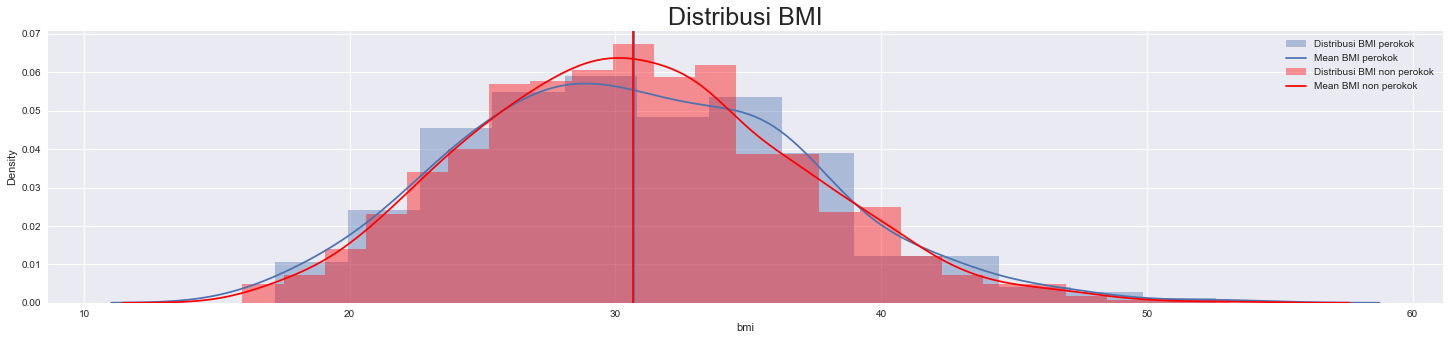

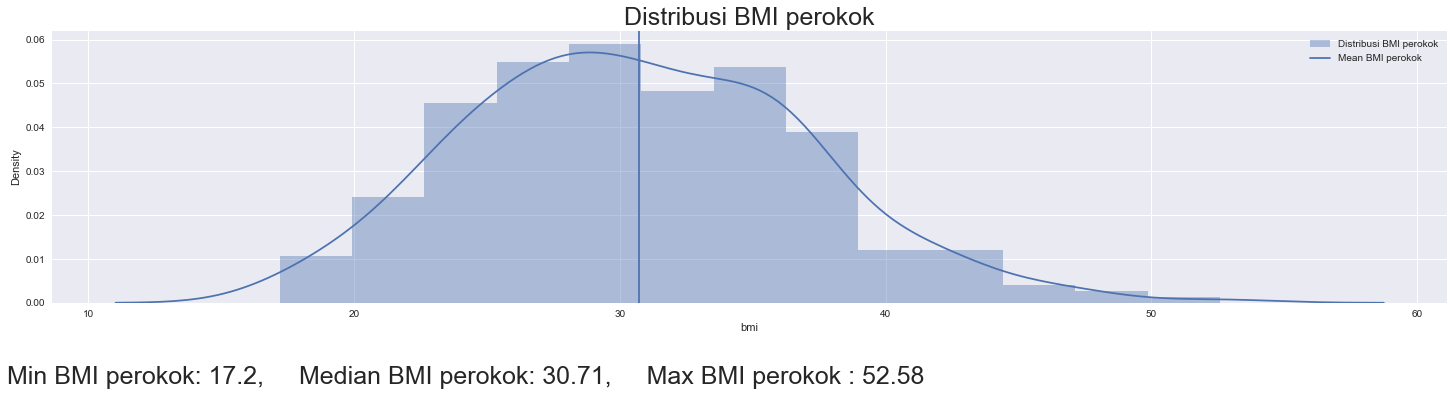

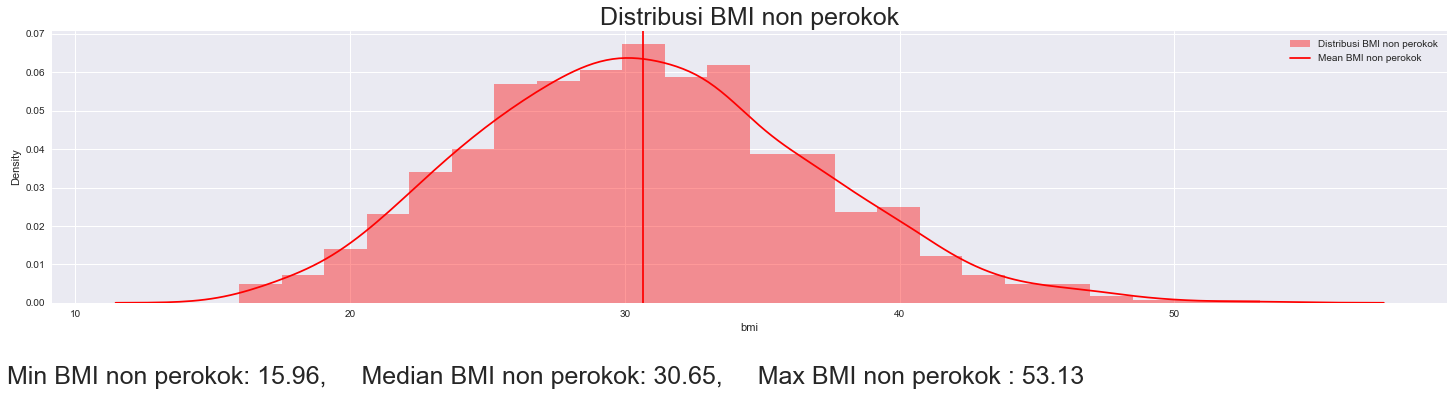

In [152]:
VARBMIperokok    = round(variance(df.bmi[df.smoker=='yes'],df.bmi[df.smoker=='yes']),2)
VARBMInonperokok = round(variance(df.bmi[df.smoker=='no'],df.bmi[df.smoker=='no']),2)

print(f'Variansi data BMI perokok     = {VARBMIperokok}')
print(f'Variansi data BMI non perokok = {VARBMInonperokok}')

STDBMIperokok    = round(standard_dev(df.bmi[df.smoker=='yes'],df.bmi[df.smoker=='yes']),2)
STDBMInonperokok = round(standard_dev(df.bmi[df.smoker=='no'],df.bmi[df.smoker=='no']),2)

print(f'STD data BMI perokok     = {STDBMIperokok}')
print(f'STD data BMI non perokok = {STDBMInonperokok}')

fig,ax=plt.subplots(figsize=(25,5))
sns.distplot(df[df.smoker=='yes']['bmi'],label='Distribusi BMI perokok')
plt.axvline(df[df.smoker=='yes']['bmi'].mean(),label='Mean BMI perokok')
sns.distplot(df[df.smoker=='no']['bmi'],label='Distribusi BMI non perokok',color='red')
plt.axvline(df[df.smoker=='no']['bmi'].mean(),label='Mean BMI non perokok',color='red')
plt.legend()
plt.title('Distribusi BMI',fontsize=25)
plt.plot()

fig,ax=plt.subplots(figsize=(25,5))
sns.distplot(df[df.smoker=='yes']['bmi'],label='Distribusi BMI perokok')
plt.axvline(df[df.smoker=='yes']['bmi'].mean(),label='Mean BMI perokok')
plt.legend()
plt.title('Distribusi BMI perokok',fontsize=25)
fig.text(0.1,-0.1,f'Min BMI perokok: {round(min(df.bmi[df.smoker=="yes"]),2)},     Median BMI perokok: {round(df.bmi[df.smoker=="yes"].mean(),2)},     Max BMI perokok : {round(max(df.bmi[df.smoker=="yes"]),2)}',fontsize=25)
plt.plot()

fig,ax=plt.subplots(figsize=(25,5))
sns.distplot(df[df.smoker=='no']['bmi'],label='Distribusi BMI non perokok',color='red')
plt.axvline(df[df.smoker=='no']['bmi'].mean(),label='Mean BMI non perokok',color='red')
plt.legend()
plt.title('Distribusi BMI non perokok',fontsize=25)
fig.text(0.1,-0.1,f'Min BMI non perokok: {round(min(df.bmi[df.smoker=="no"]),2)},     Median BMI non perokok: {round(df.bmi[df.smoker=="no"].mean(),2)},     Max BMI non perokok : {round(max(df.bmi[df.smoker=="no"]),2)}',fontsize=25)
plt.plot()

Variansi data Charges perokok     = 133207311.21
Variansi data Charges non perokok = 35925420.5
STD data Charges perokok     = 11541.55
STD data Charges non perokok = 5993.78


[]

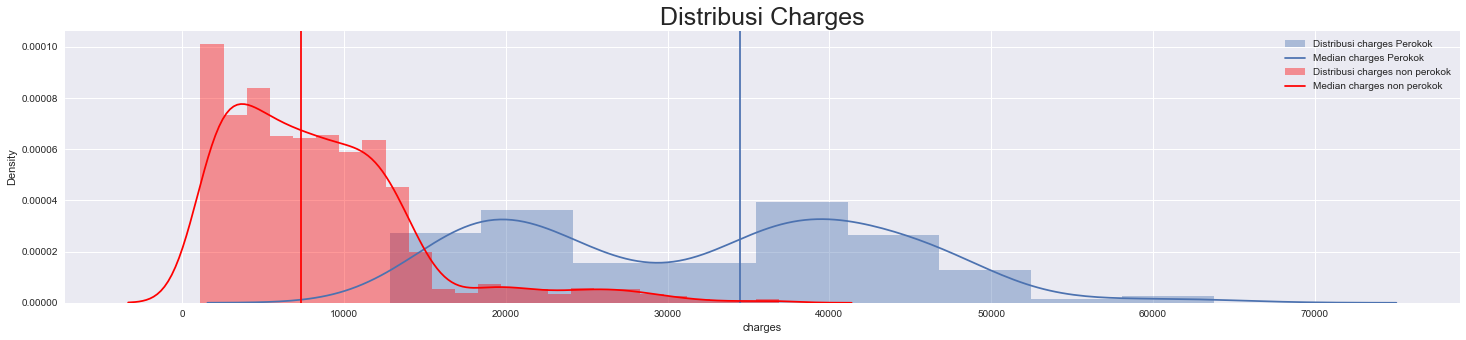

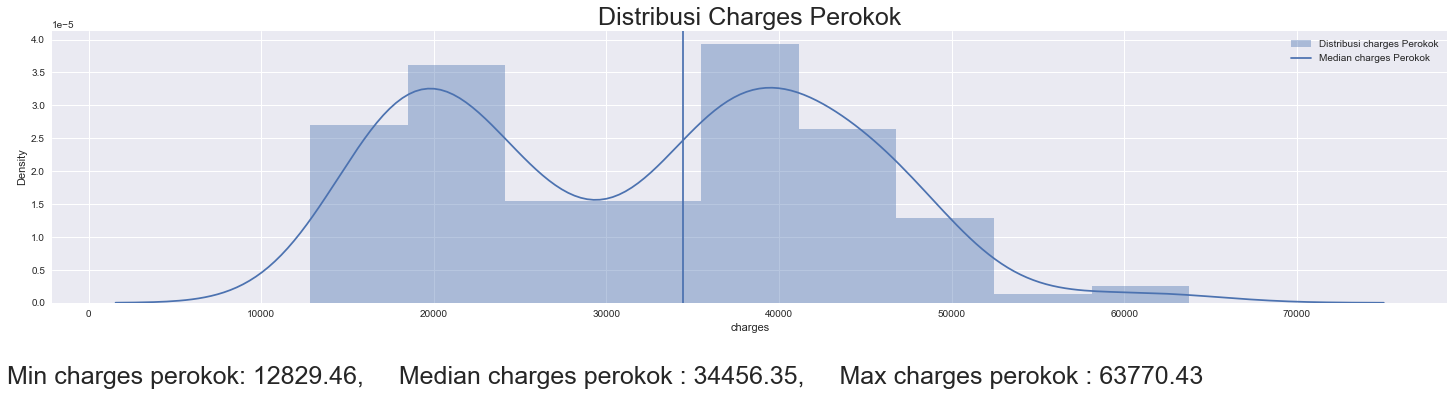

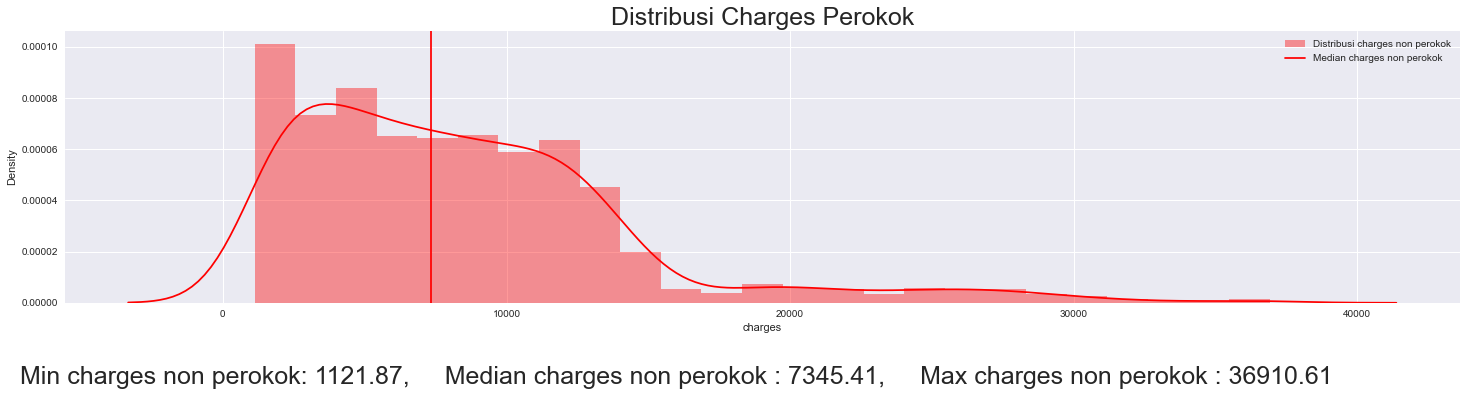

In [150]:
VARChargesperokok    = round(variance(df.charges[df.smoker=='yes'],df.charges[df.smoker=='yes']),2)
VARChargesnonperokok = round(variance(df.charges[df.smoker=='no'],df.charges[df.smoker=='no']),2)

print(f'Variansi data Charges perokok     = {VARChargesperokok}')
print(f'Variansi data Charges non perokok = {VARChargesnonperokok}')

STDChargesperokok    = round(standard_dev(df.charges[df.smoker=='yes'],df.charges[df.smoker=='yes']),2)
STDChargesnonperokok = round(standard_dev(df.charges[df.smoker=='no'],df.charges[df.smoker=='no']),2)

print(f'STD data Charges perokok     = {STDChargesperokok}')
print(f'STD data Charges non perokok = {STDChargesnonperokok}')

fig,ax=plt.subplots(figsize=(25,5))
sns.distplot(df[df.smoker=='yes']['charges'],label='Distribusi charges Perokok')
plt.axvline(df[df.smoker=='yes']['charges'].median(),label='Median charges Perokok')
sns.distplot(df[df.smoker=='no']['charges'],label='Distribusi charges non perokok',color='red')
plt.axvline(df[df.smoker=='no']['charges'].median(),label='Median charges non perokok',color='red')
plt.legend()
plt.title('Distribusi Charges',fontsize=25)
plt.plot()

fig,ax=plt.subplots(figsize=(25,5))
sns.distplot(df[df.smoker=='yes']['charges'],label='Distribusi charges Perokok')
plt.axvline(df[df.smoker=='yes']['charges'].median(),label='Median charges Perokok')
plt.legend()
plt.title('Distribusi Charges Perokok',fontsize=25)
fig.text(0.1,-0.1,f'Min charges perokok: {round(min(df.charges[df.smoker=="yes"]),2)},     Median charges perokok : {round(df.charges[df.smoker=="yes"].median(),2)},     Max charges perokok : {round(max(df.charges[df.smoker=="yes"]),2)}',fontsize=25)
plt.plot()

fig,ax=plt.subplots(figsize=(25,5))
sns.distplot(df[df.smoker=='no']['charges'],label='Distribusi charges non perokok',color='red')
plt.axvline(df[df.smoker=='no']['charges'].median(),label='Median charges non perokok',color='red')
plt.legend()
plt.title('Distribusi Charges Perokok',fontsize=25)
fig.text(0.1,-0.1,f'Min charges non perokok: {round(min(df.charges[df.smoker=="no"]),2)},     Median charges non perokok : {round(df.charges[df.smoker=="no"].median(),2)},     Max charges non perokok : {round(max(df.charges[df.smoker=="no"]),2)}',fontsize=25)
plt.plot()

## Analisa Variabel Kategorik (PMF)

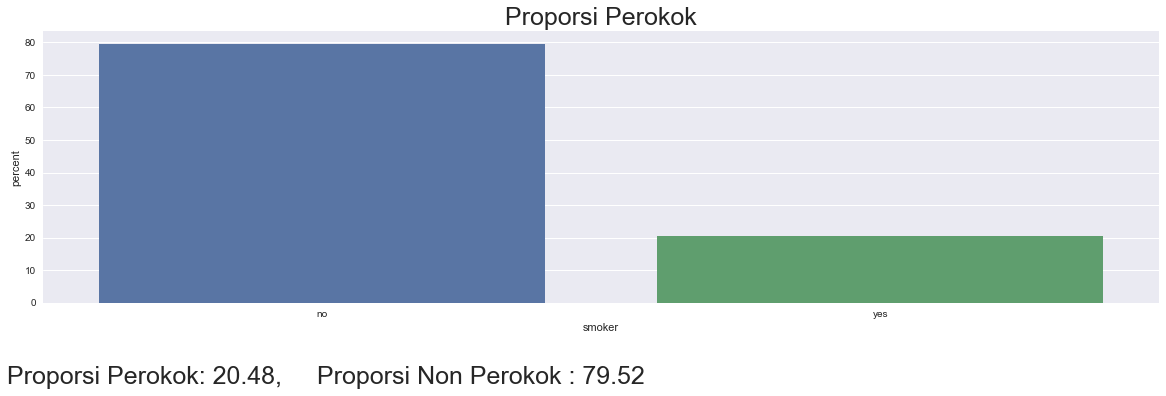

In [105]:
smoker_count = df.stb.freq(['smoker'])[['smoker','percent']]

fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=smoker_count,x='smoker',y='percent')
plt.title('Proporsi Perokok',fontsize=25)
fig.text(0.1,-0.1,f'Proporsi Perokok: {round(smoker_count.iloc[1,1],2)},     Proporsi Non Perokok : {round(smoker_count.iloc[0,1],2)}',fontsize=25)
plt.show()

## Analisa Variabel Kontinu

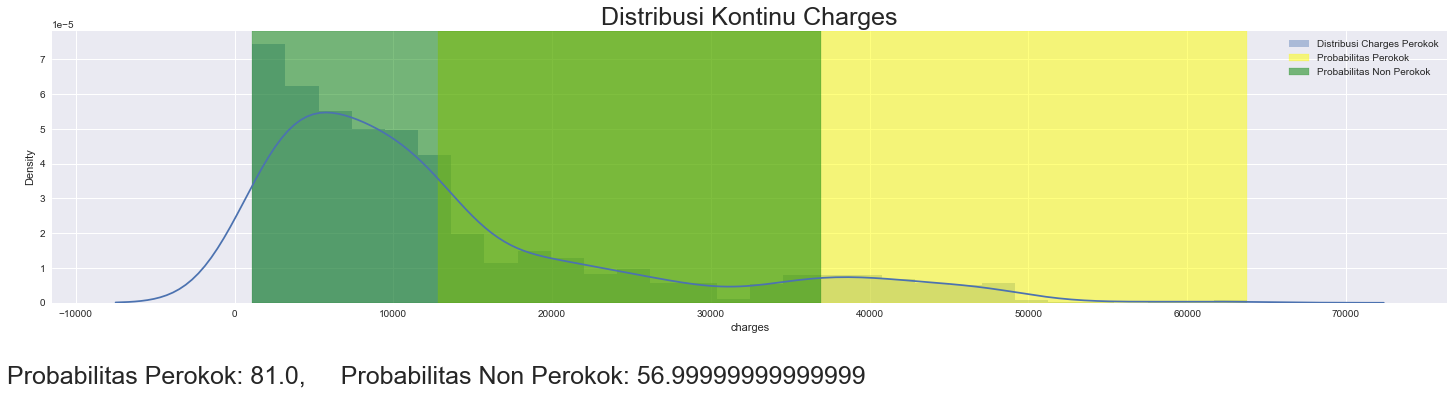

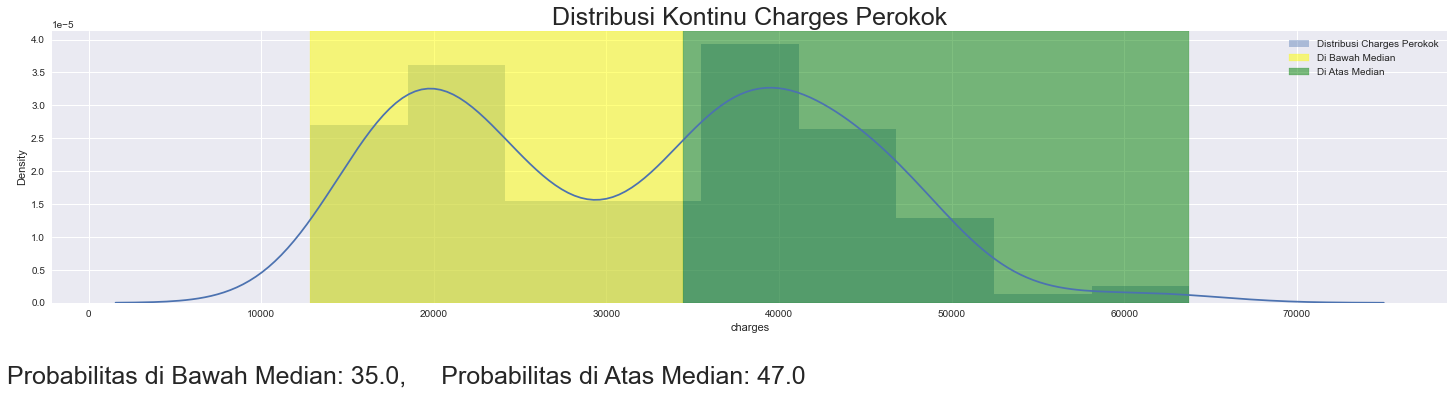

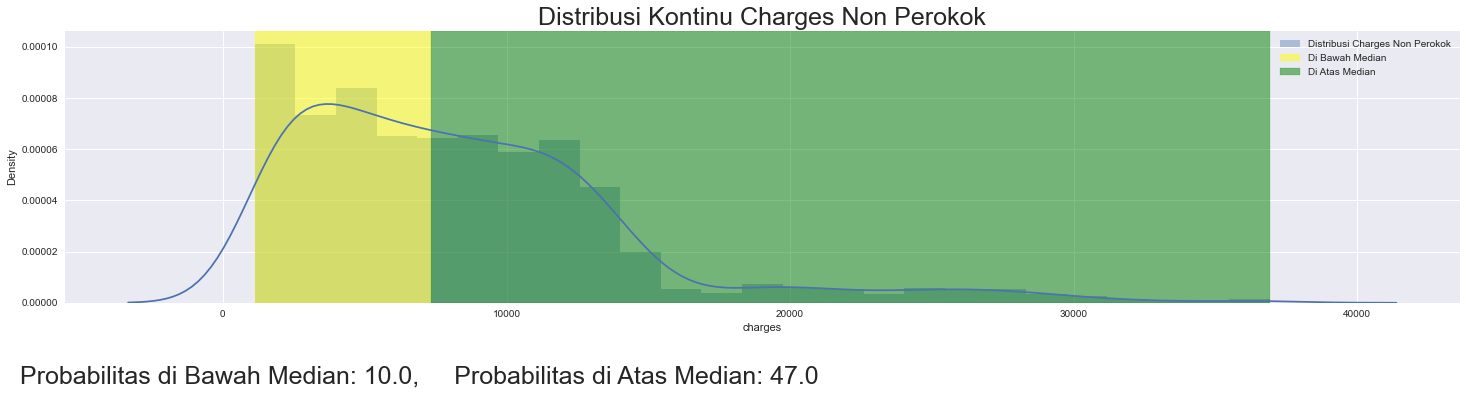

In [311]:
fig,ax = plt.subplots(1,1,figsize=(25,5))
sns.distplot(df['charges'],label='Distribusi Charges Perokok')
ax.axvspan(min(df.charges[df.smoker=='yes']),max(df.charges[df.smoker=='yes']),alpha=0.5,color='yellow',label='Probabilitas Perokok')
ax.axvspan(min(df.charges[df.smoker=='no']),max(df.charges[df.smoker=='no']),alpha=0.5,color='green',label='Probabilitas Non Perokok')
plt.legend()
plt.title('Distribusi Kontinu Charges',fontsize=25)
probPerokok     = round((max(df.charges[df.smoker=='yes'])-
                         min(df.charges[df.smoker=='yes']))/
                        (max(df.charges)-min(df.charges)),2)*100
probNonPerokok  = round((max(df.charges[df.smoker=='no'])-
                         min(df.charges[df.smoker=='no']))/
                        (max(df.charges)-min(df.charges)),2)*100
fig.text(0.1,-0.1,f'Probabilitas Perokok: {probPerokok},     Probabilitas Non Perokok: {probNonPerokok}',fontsize=25)
plt.show()

fig,ax = plt.subplots(1,1,figsize=(25,5))
sns.distplot(df[df.smoker=='yes']['charges'],label='Distribusi Charges Perokok')
ax.axvspan(min(df.charges[df.smoker=='yes']),df.charges[df.smoker=='yes'].median(),alpha=0.5,color='yellow',label='Di Bawah Median')
ax.axvspan(df.charges[df.smoker=='yes'].median(),max(df.charges[df.smoker=='yes']),alpha=0.5,color='green',label='Di Atas Median')
plt.legend()
plt.title('Distribusi Kontinu Charges Perokok',fontsize=25)
probBawahMedianYes = round((df.charges[df.smoker=='yes'].median()-
                            min(df.charges[df.smoker=='yes']))/
                           (max(df.charges)-min(df.charges)),2)*100
probAtasMedianYes  = round((max(df.charges[df.smoker=='yes'])-
                            df.charges[df.smoker=='yes'].median())/
                           (max(df.charges)-min(df.charges)),2)*100
fig.text(0.1,-0.1,f'Probabilitas di Bawah Median: {probBawahMedianYes},     Probabilitas di Atas Median: {probAtasMedianYes}',fontsize=25)
plt.show()

fig,ax = plt.subplots(1,1,figsize=(25,5))
sns.distplot(df[df.smoker=='no']['charges'],label='Distribusi Charges Non Perokok')
ax.axvspan(min(df.charges[df.smoker=='no']),df.charges[df.smoker=='no'].median(),alpha=0.5,color='yellow',label='Di Bawah Median')
ax.axvspan(df.charges[df.smoker=='no'].median(),max(df.charges[df.smoker=='no']),alpha=0.5,color='green',label='Di Atas Median')
plt.legend()
plt.title('Distribusi Kontinu Charges Non Perokok',fontsize=25)
probBawahMedianNo = round((df.charges[df.smoker=='no'].median()-
                           min(df.charges[df.smoker=='no']))/
                          (max(df.charges)-min(df.charges)),2)*100
probAtasMedianNo  = round((max(df.charges[df.smoker=='no'])-
                           df.charges[df.smoker=='no'].median())/
                          (max(df.charges)-min(df.charges)),2)*100
fig.text(0.1,-0.1,f'Probabilitas di Bawah Median: {probBawahMedianNo},     Probabilitas di Atas Median: {probAtasMedianNo}',fontsize=25)
plt.show()

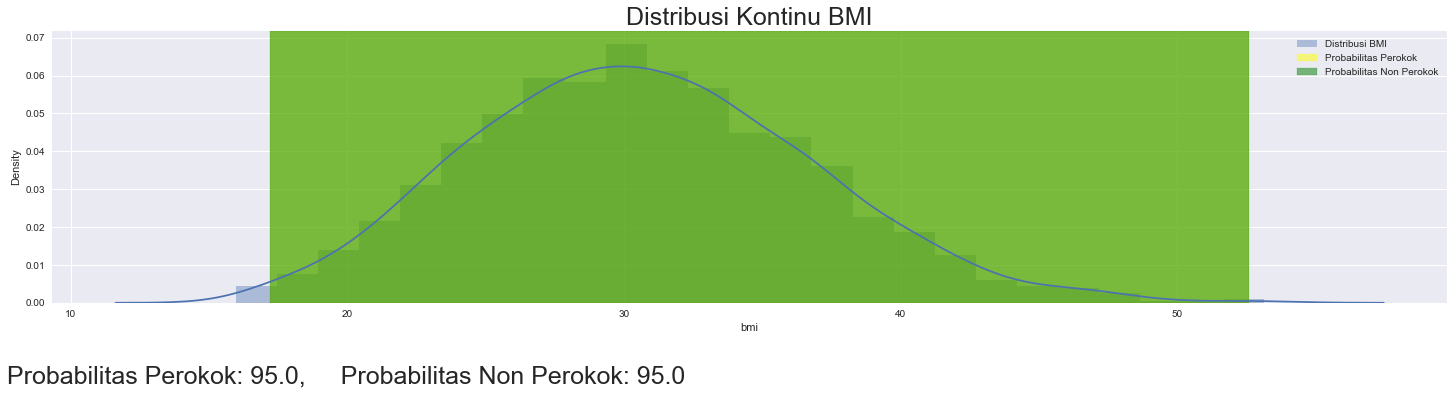

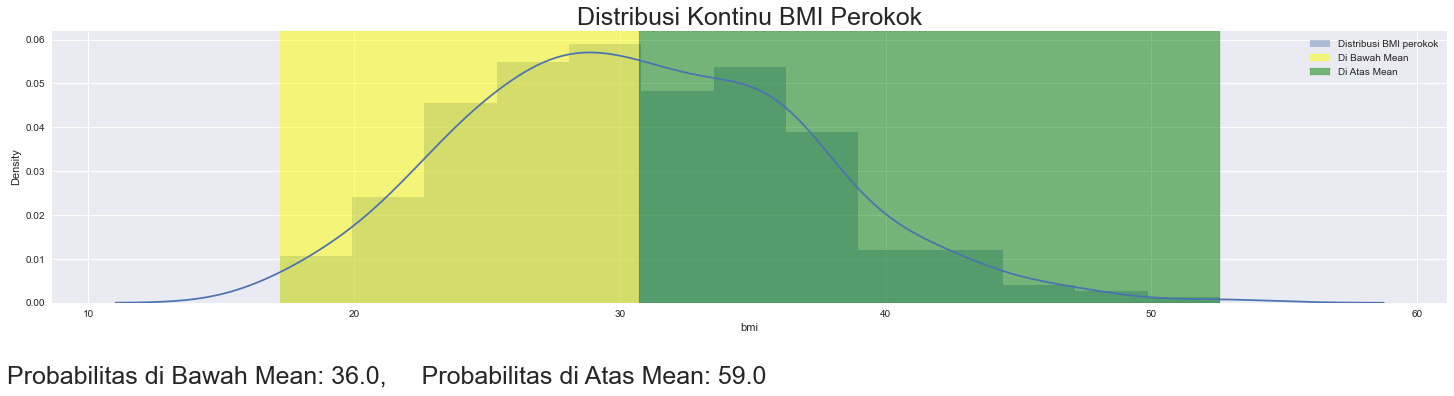

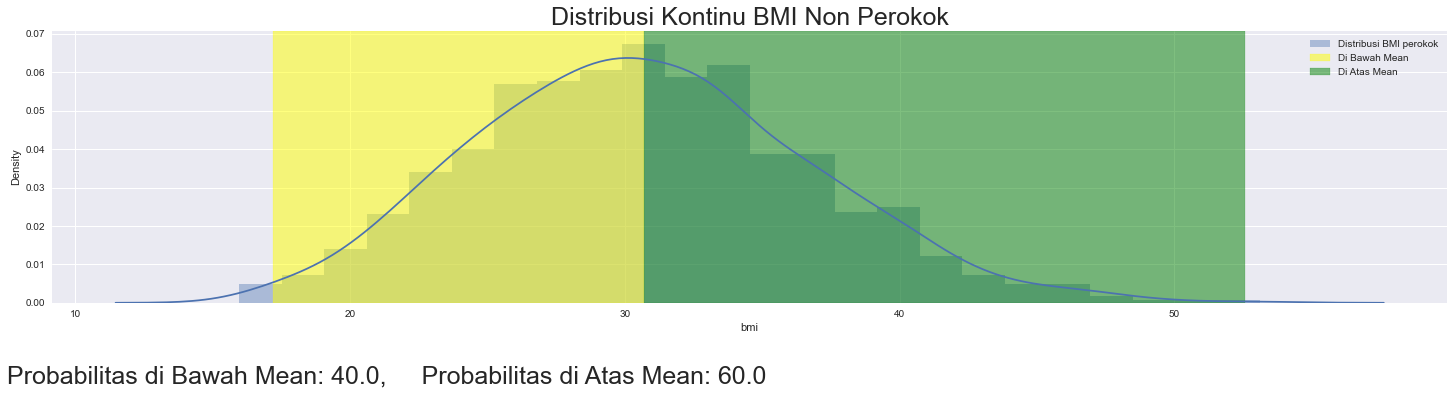

In [314]:
fig,ax = plt.subplots(1,1,figsize=(25,5))
sns.distplot(df['bmi'],label='Distribusi BMI')
ax.axvspan(min(df.bmi[df.smoker=='yes']),max(df.bmi[df.smoker=='yes']),alpha=0.5,color='yellow',label='Probabilitas Perokok')
ax.axvspan(min(df.bmi[df.smoker=='yes']),max(df.bmi[df.smoker=='yes']),alpha=0.5,color='green',label='Probabilitas Non Perokok')
plt.legend()
plt.title('Distribusi Kontinu BMI',fontsize=25)
probPerokok    = round((max(df.bmi[df.smoker=='yes'])-
                        min(df.bmi[df.smoker=='yes']))/
                       (max(df.bmi)-min(df.bmi)),2)*100
probNonPerokok = round((max(df.bmi[df.smoker=='yes'])-
                        min(df.bmi[df.smoker=='yes']))/
                       (max(df.bmi)-min(df.bmi)),2)*100
fig.text(0.1,-0.1,f'Probabilitas Perokok: {probPerokok},     Probabilitas Non Perokok: {probNonPerokok}',fontsize=25)
plt.show()

fig,ax = plt.subplots(1,1,figsize=(25,5))
sns.distplot(df[df.smoker=='yes']['bmi'],label='Distribusi BMI perokok')
ax.axvspan(min(df.bmi[df.smoker=='yes']),df.bmi[df.smoker=='yes'].mean(),alpha=0.5,color='yellow',label='Di Bawah Mean')
ax.axvspan(df.bmi[df.smoker=='yes'].mean(),max(df.bmi[df.smoker=='yes']),alpha=0.5,color='green',label='Di Atas Mean')
plt.legend()
plt.title('Distribusi Kontinu BMI Perokok',fontsize=25)
probBawahMeanYes = round((df.bmi[df.smoker=='yes'].mean()-
                          min(df.bmi[df.smoker=='yes']))/
                         (max(df.bmi)-min(df.bmi)),2)*100
probAtasMeanYes  = round((max(df.bmi[df.smoker=='yes'])-
                          df.bmi[df.smoker=='yes'].mean())/
                         (max(df.bmi)-min(df.bmi)),2)*100
fig.text(0.1,-0.1,f'Probabilitas di Bawah Mean: {probBawahMeanYes},     Probabilitas di Atas Mean: {probAtasMeanYes}',fontsize=25)
plt.show()

fig,ax = plt.subplots(1,1,figsize=(25,5))
sns.distplot(df[df.smoker=='no']['bmi'],label='Distribusi BMI perokok')
ax.axvspan(min(df.bmi[df.smoker=='yes']),df.bmi[df.smoker=='yes'].mean(),alpha=0.5,color='yellow',label='Di Bawah Mean')
ax.axvspan(df.bmi[df.smoker=='yes'].mean(),max(df.bmi[df.smoker=='yes']),alpha=0.5,color='green',label='Di Atas Mean')
plt.legend()
plt.title('Distribusi Kontinu BMI Non Perokok',fontsize=25)
probBawahMeanNo = round((df.bmi[df.smoker=='no'].mean()-
                         min(df.bmi[df.smoker=='no']))/
                        (max(df.bmi)-min(df.bmi)),2)*100
probAtasMeanNo  = round((max(df.bmi[df.smoker=='no'])-
                         df.bmi[df.smoker=='no'].mean())/
                        (max(df.bmi)-min(df.bmi)),2)*100
fig.text(0.1,-0.1,f'Probabilitas di Bawah Mean: {probBawahMeanNo},     Probabilitas di Atas Mean: {probAtasMeanNo}',fontsize=25)
plt.show()

## Analisa Korelasi Variabel

<AxesSubplot:>

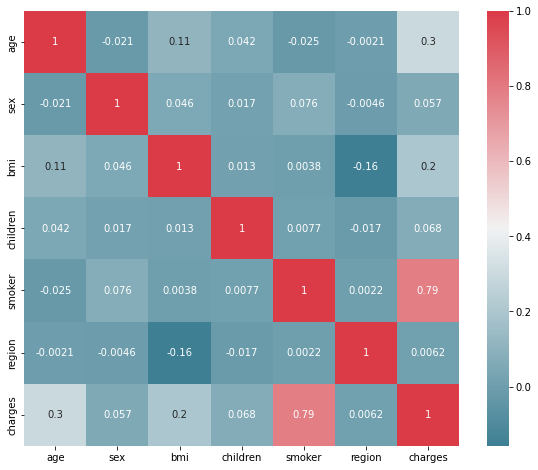

In [28]:
f,ax=plt.subplots(figsize=(10,8))
corrmat = dfn.corr()
sns.heatmap(corrmat,annot=True,mask=np.zeros_like(corrmat,dtype=np.bool),
            cmap=sns.diverging_palette(220,10,as_cmap=True),
            square=True,ax=ax)

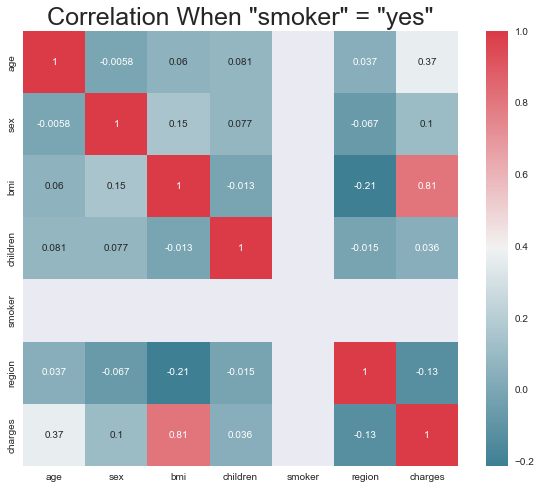

In [149]:
f,ax=plt.subplots(figsize=(10,8))
corrmat = dfn[dfn.smoker==1].corr()
sns.heatmap(corrmat,annot=True,mask=np.zeros_like(corrmat,dtype=np.bool),
            cmap=sns.diverging_palette(220,10,as_cmap=True),
            square=True,ax=ax)
plt.title('Correlation When "smoker" = "yes"',fontsize=25)
plt.show()

## Hypothesis Testing

### Smoking and BMI

H0 : smoker_bmi < nonsmoker_bmi

H1 : smoker_bmi > nonsmoker_bmi

In [267]:
smoker_bmi              = df['bmi'][df['smoker']=='yes']
nonsmoker_bmi           = df['bmi'][df['smoker']=='no']
samp_smoker_bmi_mean    = int(smoker_bmi.sample(n=30).mean())
samp_nonsmoker_bmi_mean = int(nonsmoker_bmi.sample(n=30).mean())
tot_smoker_bmi_mean     = int(smoker_bmi.mean())
tot_nonsmoker_bmi_mean  = int(nonsmoker_bmi.mean())

samp_median_array = np.array([samp_nonsmoker_bmi_mean,
                              samp_smoker_bmi_mean])
tot_median_array  = np.array([tot_nonsmoker_bmi_mean,
                              tot_smoker_bmi_mean])

In [268]:
samp_smoker_bmi_mean

26

In [269]:
samp_nonsmoker_bmi_mean

29

In [270]:
tot_smoker_bmi_mean

30

In [271]:
tot_nonsmoker_bmi_mean

30

In [272]:
(test_stat,p_value) = proportions_ztest(count=samp_median_array,
                                        nobs=tot_median_array,
                                        alternative='larger')
print("The computed Z test statistic is : ",test_stat)
print("The p-value is                   : ",p_value)

The computed Z test statistic is :  1.4012980994907407
The p-value is                   :  0.08056247464452598


In [273]:
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


Terima H0


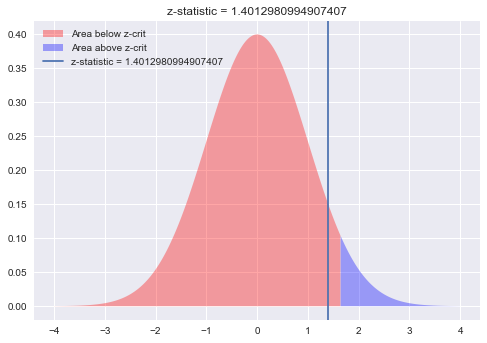

In [274]:
plt.style.use('seaborn')

plt.fill_between(x=np.arange(-4,1.645,0.01),
                 y1=stats.norm.pdf(np.arange(-4,1.645,0.01)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area below z-crit')

plt.fill_between(x=np.arange(1.645,4,0.01),
                 y1=stats.norm.pdf(np.arange(1.645,4,0.01)),
                 facecolor='blue',
                 alpha=0.35,
                 label='Area above z-crit')
plt.axvline(test_stat,label=f'z-statistic = {test_stat}')
plt.legend()
plt.title(f'z-statistic = {test_stat}')

if p_value > 0.05:
    print('Terima H0')
else:
    print('Tolak H0, terima Ha')

### Smoker BMI and Charges

H0 : smoker_bmi_overmean_charges < smoker_bmi_undermean_charges

H1 : smoker_bmi_overmean_charges > smoker_bmi_undermean_charges

In [243]:
smoker_bmi_overmean_charges           = df['charges'][(df['bmi']>df['bmi'].mean())&(df['smoker']=='yes')]
smoker_bmi_undermean_charges          = df['charges'][(df['bmi']<df['bmi'].mean())&(df['smoker']=='yes')]
samp_smoker_bmi_overmean_charges_med  = int(smoker_bmi_overmean_charges.sample(n=30).median())
samp_smoker_bmi_undermean_charges_med = int(smoker_bmi_undermean_charges.sample(n=30).median())
tot_smoker_bmi_overmean_charges_med   = int(smoker_bmi_overmean_charges.median())
tot_smoker_bmi_undermean_charges_med  = int(smoker_bmi_undermean_charges.median())

samp_median_array = np.array([samp_smoker_bmi_undermean_charges_med,
                              samp_smoker_bmi_overmean_charges_med])
tot_median_array  = np.array([tot_smoker_bmi_undermean_charges_med,
                              tot_smoker_bmi_overmean_charges_med])

In [275]:
samp_smoker_bmi_overmean_charges_med

38471

In [276]:
samp_smoker_bmi_undermean_charges_med

21724

In [280]:
tot_smoker_bmi_overmean_charges_med

40974

In [277]:
tot_smoker_bmi_undermean_charges_med

20984

In [244]:
(test_stat,p_value) = proportions_ztest(count=samp_median_array,
                                        nobs=tot_median_array,
                                        alternative='larger')
print("The computed Z test statistic is : ",test_stat)
print("The p-value is                   : ",p_value)

The computed Z test statistic is :  68.26585901329508
The p-value is                   :  0.0


In [245]:
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


Tolak H0, terima Ha


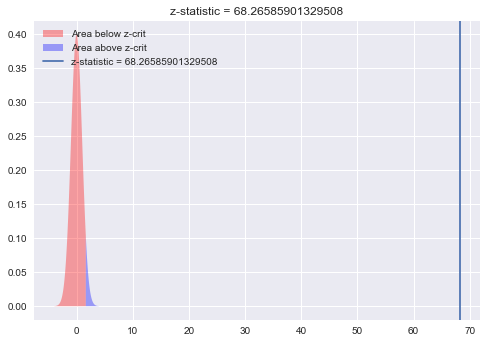

In [246]:
plt.style.use('seaborn')

plt.fill_between(x=np.arange(-4,1.645,0.01),
                 y1=stats.norm.pdf(np.arange(-4,1.645,0.01)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area below z-crit')

plt.fill_between(x=np.arange(1.645,4,0.01),
                 y1=stats.norm.pdf(np.arange(1.645,4,0.01)),
                 facecolor='blue',
                 alpha=0.35,
                 label='Area above z-crit')
plt.axvline(test_stat,label=f'z-statistic = {test_stat}')
plt.legend()
plt.title(f'z-statistic = {test_stat}')

if p_value > 0.05:
    print('Terima H0')
else:
    print('Tolak H0, terima Ha')